<a href="https://colab.research.google.com/github/Ajay0110/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
# The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.
#Data Description
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not 

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost), 2(high cost) and 3(very high cost).

### Importing important libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Mount the drive

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the dataset

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Classification EDA Capstone Project/data_mobile_price_range.csv')

### To display all columns and rows

In [4]:
# To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Head and Tail of the dataset

In [5]:
# Displaying first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Displaying last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


### Getting the shape of the dataset

In [7]:
# Getting the shape of the dataset
df.shape

(2000, 21)

### Renaming the columns for better understanding

In [8]:
# Renaming columns
df.rename(columns = {'blue':'bluetooth', 'fc':'front_cam_pix','int_memory':'internal_memory','m_dep':'mobile_depth','mobile_wt':'mobile_weight','pc':'primary_cam_pix','sc_h':'screen_height','sc_w':'screen_width'}, inplace = True)

In [9]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Checking datatypes and null values

In [10]:
# Information on null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   battery_power    2000 non-null   int64  
 1   bluetooth        2000 non-null   int64  
 2   clock_speed      2000 non-null   float64
 3   dual_sim         2000 non-null   int64  
 4   front_cam_pix    2000 non-null   int64  
 5   four_g           2000 non-null   int64  
 6   internal_memory  2000 non-null   int64  
 7   mobile_depth     2000 non-null   float64
 8   mobile_weight    2000 non-null   int64  
 9   n_cores          2000 non-null   int64  
 10  primary_cam_pix  2000 non-null   int64  
 11  px_height        2000 non-null   int64  
 12  px_width         2000 non-null   int64  
 13  ram              2000 non-null   int64  
 14  screen_height    2000 non-null   int64  
 15  screen_width     2000 non-null   int64  
 16  talk_time        2000 non-null   int64  
 17  three_g       

In [11]:
# Checking for null values
df.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_cam_pix      0
four_g             0
internal_memory    0
mobile_depth       0
mobile_weight      0
n_cores            0
primary_cam_pix    0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

### Describing the dataframe

In [12]:
# Using describe()
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Checking for outliers

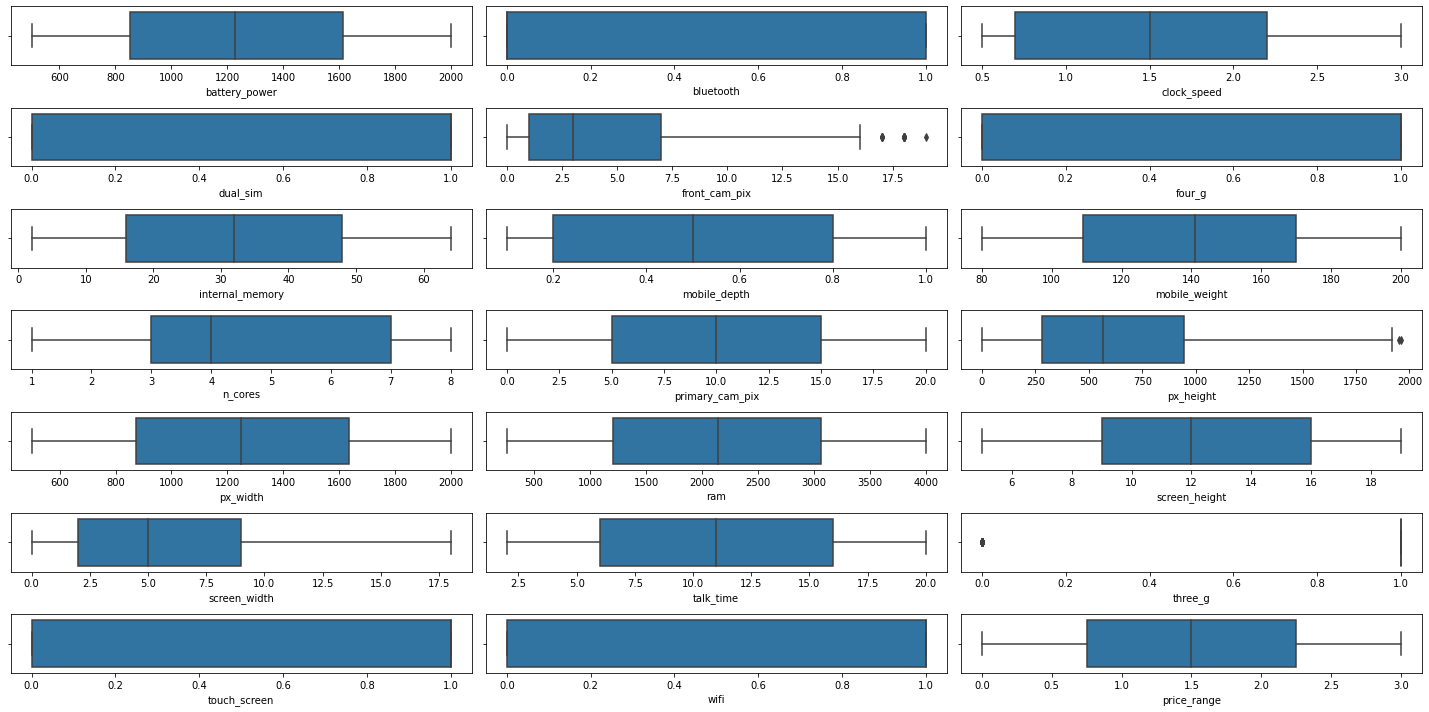

In [13]:
# Box plot to outlier check
plt.figure(figsize = (20, 10))
x = 1
for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x = x+1
plt.tight_layout()

In [14]:
# To find outliers
out_ls = ['front_cam_pix','px_height']
tot_outliers = 0
for col in out_ls:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  ls = df.index[(df[col] < lower) | (df[col] > upper)]
  print(f"Total outliers found in column {col} are {len(ls)}")
  tot_outliers = tot_outliers+len(ls)
  df = df.drop(ls)
print(f"The total outliers found are {tot_outliers}")
print(f"Total percentage of outliers: {(tot_outliers / len(df)*100)} %")

Total outliers found in column front_cam_pix are 18
Total outliers found in column px_height are 2
The total outliers found are 20
Total percentage of outliers: 1.0101010101010102 %


In [15]:
df.shape

(1980, 21)

### About 1% of outliers were found which is removed, since it won't make any difference

# To handle zeroes in px_height and screen_width

In [16]:
# Getting rows that have px_height of value zero
df[df['px_height'] == 0]

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [17]:
# Getting rows that have px_width of value zero
df[df['screen_width'] == 0]

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,1,0,1,2
54,1073,1,0.5,1,0,0,51,0.5,145,7,0,690,804,2908,6,0,18,0,1,0,2
62,1156,1,1.2,1,0,1,50,0.8,159,2,0,322,547,470,7,0,15,1,1,0,0
73,1038,0,1.2,0,3,0,43,0.7,141,1,5,4,638,3709,11,0,12,1,1,1,3
86,1496,1,2.0,1,4,0,42,0.5,182,5,5,96,741,854,16,0,7,0,1,1,0
119,1778,0,0.5,0,0,0,15,0.5,102,3,0,1445,1954,1214,5,0,14,1,0,0,1


In [18]:
# Total number of rows that have 0 under screen_width column
print(f"Total zeroes in column screen_width is {len(df[df['screen_width'] == 0])}")

Total zeroes in column screen_width is 180


### Replacing zeros with mean of that particular column

In [19]:
# Columns that contain zero which dont make sense
zero = ['px_height', 'screen_width']
for col in zero:
  # Grouping with price_range
  print(f"The mean {col} for each {df.groupby('price_range')[col].mean()}")
  # Replacing zeroes with NaN
  df[col] = df[col].replace(0, np.nan)
  # Replacing NaN with mean
  df[col] = df[col].fillna(df.groupby('price_range')[col].transform('mean'))

The mean px_height for each price_range
0    535.344758
1    665.371717
2    627.308468
3    737.340771
Name: px_height, dtype: float64
The mean screen_width for each price_range
0    5.697581
1    5.561616
2    5.685484
3    6.152130
Name: screen_width, dtype: float64


In [20]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1


### Creating columns based on camera

In [21]:
# Creating new columns based on camera present
cam = ['front_cam_pix','primary_cam_pix']
for col in cam:
  df.loc[df[col] == 0, col+'_present'] = 0
  df.loc[df[col] > 0, col+'_present'] = 1

In [22]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,1,1.0,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2,0.0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2,1.0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2,0.0,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1,1.0,1.0


### Display size is the hypotenuse of the phone which can be derived using pythagoras theorem where screen height and width is already given. 

In [23]:
# Getting Display size in inches using pythagoras theorem
df['display_size'] = ((np.sqrt(df['screen_height']**2 + df['screen_width']**2)/2.54)).round(2)

In [24]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,1,1.0,1.0,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2,0.0,1.0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2,1.0,1.0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2,0.0,1.0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1,1.0,1.0,3.25


In [25]:
# Dropping screen height and width
df.drop(columns = ['screen_height', 'screen_width'], inplace = True)
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25


### Creating a new column based on slim attributes of the mobile where depth must be less than 0.7 cm and mobile weight less than 140 grams also it has to be touch screen.

In [26]:
# Getting slim phones
df.loc[(df['mobile_depth'] < 0.7) & (df['mobile_weight'] < 140) & (df['touch_screen'] == 1), 'slim'] = '1'

In [27]:
# Replacing NaN with zeros
df['slim'].value_counts()
df['slim'].fillna(0, inplace = True)

In [28]:
# Getting the value count of the column slim
df['slim'].value_counts()

0    1654
1     326
Name: slim, dtype: int64

In [29]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0


### Creating a column called screen_type where 1 means 'HD' and 0 means 'Not HD'

In [30]:
# Getting screen types hd or not hd
df.loc[(df['px_width'] < 1280) | (df['px_height'] < 720), 'screen_type'] = '0'
df.loc[(df['px_width'] >= 1280) | (df['px_height'] >= 720), 'screen_type'] = '1'

### Creating a column called PPI using pixel height and width

First, you need to calculate the number of pixels that fit on the diagonal:

dₒ = √(w² + h²)

where:

w — Number of pixels along the horizontal line;

h — Number of pixels along the vertical line.
Then, you can calculate the PPI as the ratio between the number of pixels along the diagonal and the diagonal screen size:

PPI = dₒ/dᵢ

where dᵢ is the diagonal screen size in inches.

In [31]:
df['ppi'] = np.sqrt(df['px_height']**2 + df['px_width']**2)/df['display_size']

# Binning columns for better EDA

### Binning RAM into group of RAM sizes

In [32]:
# Creating a binned RAM size
bin_ram_size = [256, 512, 1000, 2000, 3000, 4000]
label_ram = ['256 to 512 MB', '512 MB to 1GB', '1 to 2 GB', '2 to 3 GB', '3 to 4 GB']

df['ram_size'] = pd.cut(df['ram'], bins = bin_ram_size, labels = label_ram)

df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim,screen_type,ppi,ram_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0,0,168.433074,2 to 3 GB
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0,1,321.220673,2 to 3 GB
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0,1,484.246934,2 to 3 GB
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0,1,306.911944,2 to 3 GB
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0,1,526.523307,1 to 2 GB


### Binning Clock Speed into groups of speed

In [33]:
# Creating a binned clock speed
clock_speed_bin = [0, 1.0,1.5,2.0,2.5,3.0]
clock_bin_label = ['upto 1GHz', 'upto 1.5GHz', 'upto 2GHz', 'upto 2.5GHz', 'upto 3.0GHz']
df['speed'] = pd.cut(df['clock_speed'], bins = clock_speed_bin, labels = clock_bin_label)
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim,screen_type,ppi,ram_size,speed
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0,0,168.433074,2 to 3 GB,upto 2.5GHz
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0,1,321.220673,2 to 3 GB,upto 1GHz
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0,1,484.246934,2 to 3 GB,upto 1GHz
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0,1,306.911944,2 to 3 GB,upto 2.5GHz
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0,1,526.523307,1 to 2 GB,upto 1.5GHz


### Binning camera pixels

In [34]:
# Creating a binned primary camera
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}
df['primary_camera'] = pd.cut(df['primary_cam_pix'], bins = bin_camera, labels = bin_camera_label)
df['primary_camera'] = df['primary_camera'].cat.add_categories('No Camera')
df['primary_camera'] = df['primary_camera'].fillna(df['primary_cam_pix'].map(camera_dict))
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim,screen_type,ppi,ram_size,speed,primary_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0,0,168.433074,2 to 3 GB,upto 2.5GHz,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0,1,321.220673,2 to 3 GB,upto 1GHz,upto 8MP
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0,1,484.246934,2 to 3 GB,upto 1GHz,upto 8MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0,1,306.911944,2 to 3 GB,upto 2.5GHz,upto 12MP
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0,1,526.523307,1 to 2 GB,upto 1.5GHz,upto 16MP


In [35]:
# Creating a binned front camera
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}
df['front_camera'] = pd.cut(df['front_cam_pix'], bins = bin_camera, labels = bin_camera_label)
df['front_camera'] = df['front_camera'].cat.add_categories('No Camera')
df['front_camera'] = df['front_camera'].fillna(df['front_cam_pix'].map(camera_dict))
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,slim,screen_type,ppi,ram_size,speed,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,0,0,168.433074,2 to 3 GB,upto 2.5GHz,upto 4MP,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,0,1,321.220673,2 to 3 GB,upto 1GHz,upto 8MP,No Camera
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,0,1,484.246934,2 to 3 GB,upto 1GHz,upto 8MP,upto 4MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,0,1,306.911944,2 to 3 GB,upto 2.5GHz,upto 12MP,No Camera
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,0,1,526.523307,1 to 2 GB,upto 1.5GHz,upto 16MP,upto 16MP


# Univariate Analysis

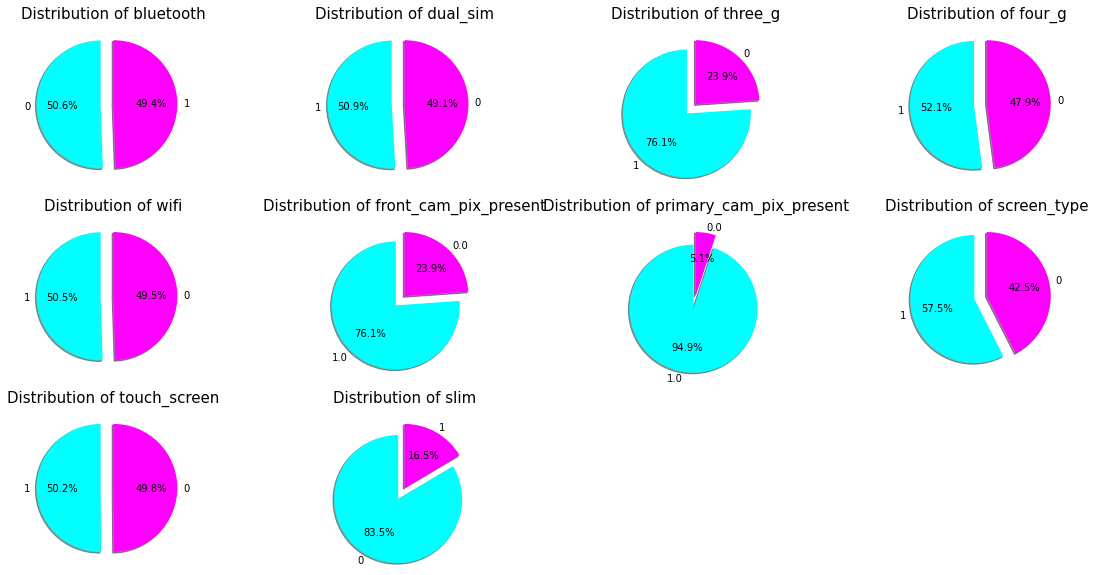

In [36]:
# Initializing count variable
count = 0
# Setting fig size
plt.figure(figsize=(20,10))
# List containing binary columns
binary_cols = ['bluetooth','dual_sim','three_g','four_g','wifi','front_cam_pix_present','primary_cam_pix_present','screen_type','touch_screen','slim']
# Pie plot for all the binary columns
for i in binary_cols:
    myexplode = [0.2, 0]
    colors = ['cyan','magenta','black']    
    labels = df[i].value_counts().index
    sizes = df[i].value_counts().values      
    plt.subplot(3,4,count+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
    plt.title(f'Distribution of {binary_cols[count]}', color = 'black',fontsize = 15)
    count += 1


### Analysis

*   We have bluetooth, dual_sim, wifi and touch_screen with almost 50-50 distribution
*   Front camera is 76% available, whereas primary is 95%. 

*   Also we have almost 58% of the data containing HD screen_type
*   Based on weight and depth, slim variable is derived which is 16.5% i.e, mobiles with slim attribute. 

*   Distribution of 4G technology is less when compared to 3G, this is some pretty old dataset.








In [37]:
# Getting remaining columns
cols = set(df.columns) - set(binary_cols)
cols

{'battery_power',
 'clock_speed',
 'display_size',
 'front_cam_pix',
 'front_camera',
 'internal_memory',
 'mobile_depth',
 'mobile_weight',
 'n_cores',
 'ppi',
 'price_range',
 'primary_cam_pix',
 'primary_camera',
 'px_height',
 'px_width',
 'ram',
 'ram_size',
 'speed',
 'talk_time'}

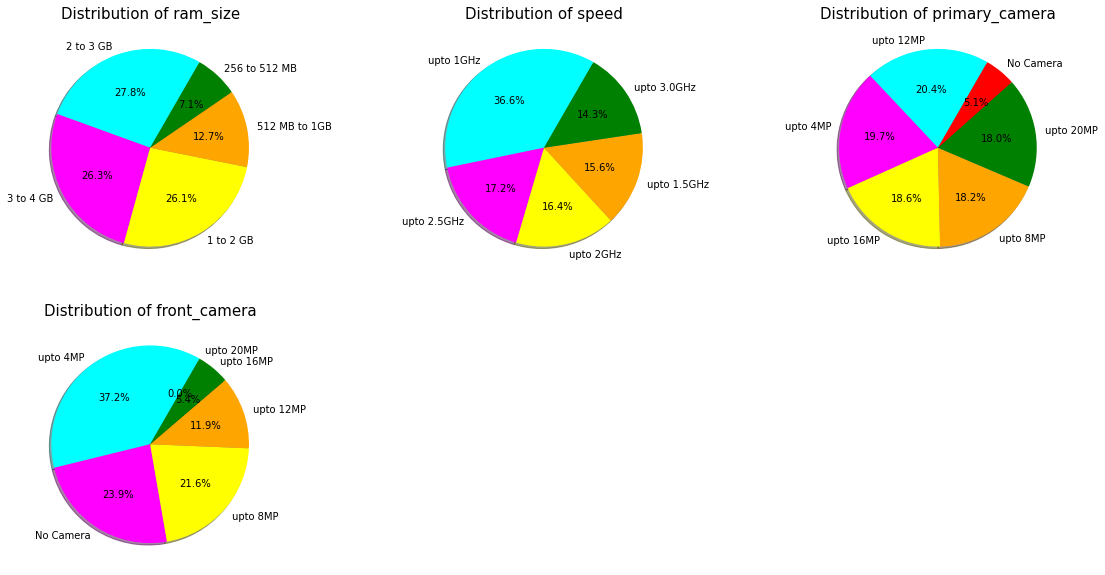

In [38]:
# Pie plot for categorical variables.
count = 0
plt.figure(figsize=(20,10))
cat_var = ['ram_size', 'speed', 'primary_camera', 'front_camera']
for i in cat_var:
  myexplode = [0.2, 0]
  colors = ['cyan','magenta','yellow','orange','green',	'red']    
  labels = df[i].value_counts().index
  sizes = df[i].value_counts().values      
  plt.subplot(2,3,count+1)
  plt.pie(sizes, labels=labels, shadow = True, startangle=60, colors=colors, autopct='%1.1f%%')
  plt.title(f'Distribution of {cat_var[count]}', color = 'black',fontsize = 15)
  count += 1

### Analysis

*   From ram_size it is seen that most mobiles have 2 to 4 GB RAM, and lower RAM represent a mobile with basic features. Higher the RAM, higher the quality of fetching and processing data and higher the features of the mobile.
*   From speed, we can see that most of the mobiles have clock_speed upto 1 GHz, which constitutes the basic mobiles. For smartphones the clock speed starts anywhere from 1 GHz like Helio processor upto 3 GHz like snap dragon.


*   Primary camera is the rear camera, which is the very first appearance of cameras in mobiles. Here a small percentage has no camera.
*   Front camera started making it's appearance as selfie camera in 2010 and around 36% has pixels upto 4 MP and almost 1% have pixels upto 20 MP.





In [39]:
corr = df.corr()
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range                1.000000
ram                        0.917009
battery_power              0.200763
px_width                   0.165132
px_height                  0.145231
ppi                        0.080131
primary_cam_pix_present    0.043742
internal_memory            0.043458
display_size               0.036937
primary_cam_pix            0.033871
three_g                    0.025462
front_cam_pix_present      0.021774
front_cam_pix              0.021120
talk_time                  0.020582
dual_sim                   0.019016
wifi                       0.017192
four_g                     0.015906
bluetooth                  0.015798
n_cores                    0.008307
mobile_depth              -0.000925
clock_speed               -0.006120
mobile_weight             -0.031628
touch_screen              -0.033888
Name: price_range, dtype: float64

In [40]:
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim',
       'front_cam_pix', 'four_g', 'internal_memory', 'mobile_depth',
       'mobile_weight', 'n_cores', 'primary_cam_pix', 'px_height', 'px_width',
       'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range',
       'front_cam_pix_present', 'primary_cam_pix_present', 'display_size',
       'slim', 'screen_type', 'ppi', 'ram_size', 'speed', 'primary_camera',
       'front_camera'],
      dtype='object')

In [41]:
# Function to create distribution plot that takes feature as input
def price_plot(df,col):
  count = 0
  i = 0
  plt.figure(figsize = (15,15))
  while True:
    df_price = df[df['price_range']==i]
    plt.subplot(2,2,count+1)
    sns.distplot(df_price[col])
    plt.title(f'{col} distribution of price range {i}')
    i += 1
    count+=1
    if i == 4:
      break

### RAM distribution based on price range

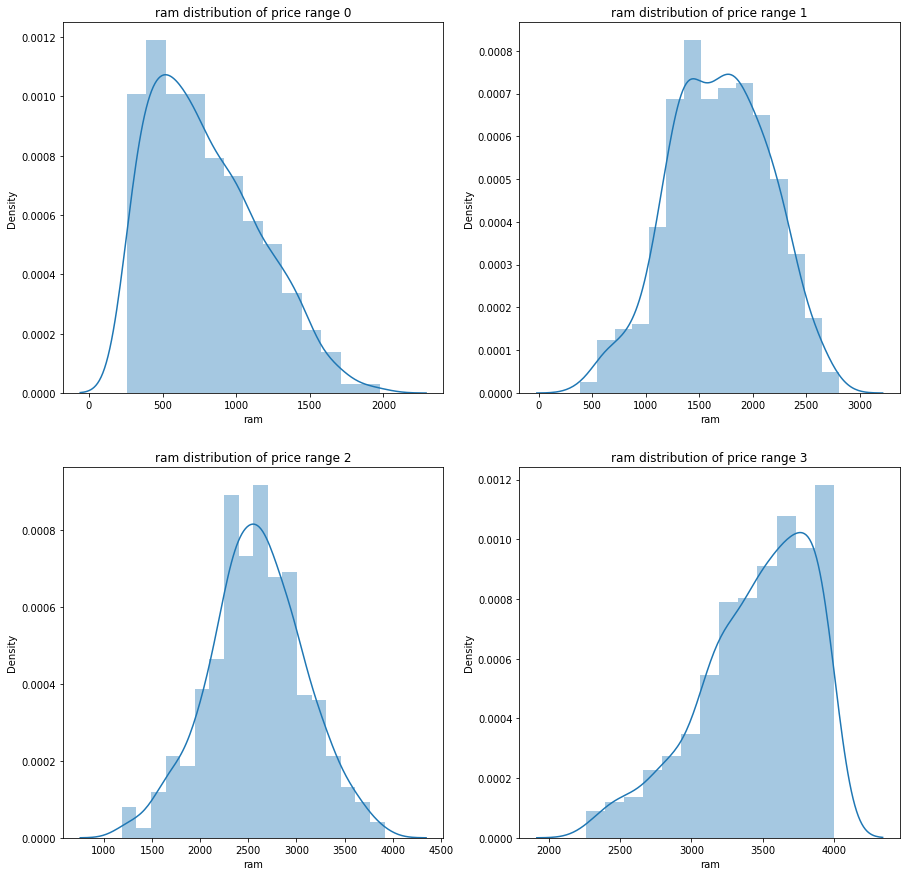

In [42]:
price_plot(df,'ram')

*   Higher the price range, higher RAM size leading to negative skew in price range 3. Reverse is also true leading to positive skew in price range 0
*   Price range 1 and 2 are normally distributed since they have concentrated maximum of 1.5 GB under price range 1 and 2.5 GB under price range 2





### Battery Power based on price range

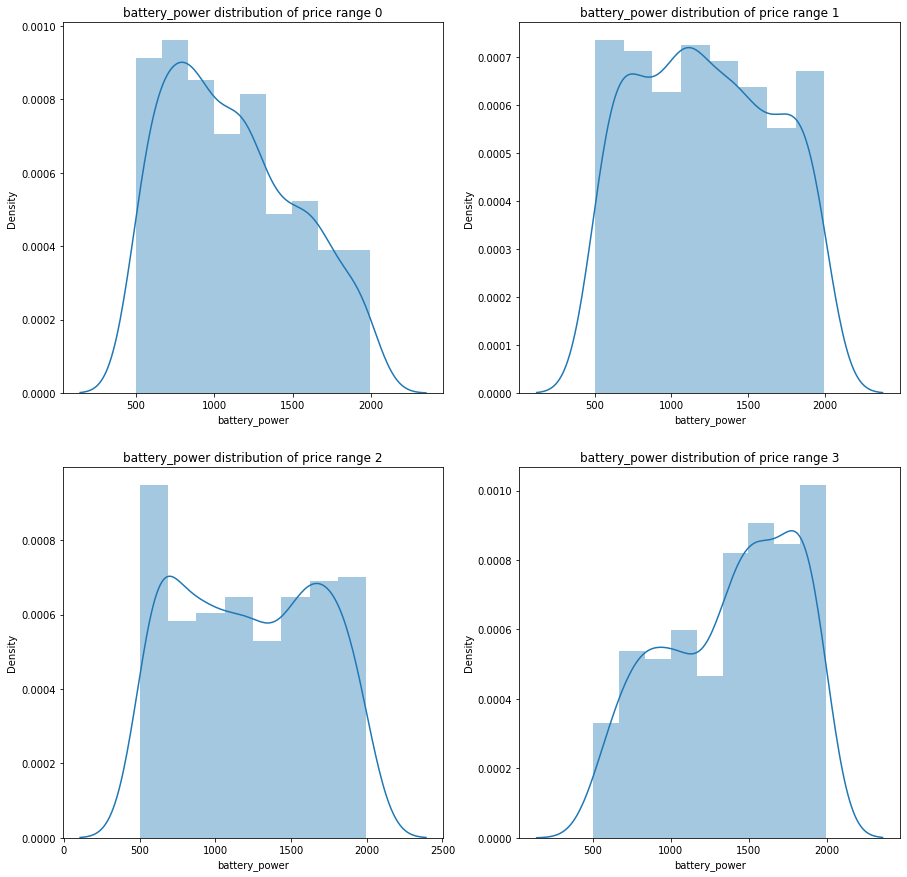

In [43]:
price_plot(df,'battery_power')

*   Under price range 0 we have more batteries with low mAh. As battery range increases the number of mobiles decreases.
*   Reverse is also true here, under price range 3.
*   Under price range 1, there are batteries upto 2000 mah, which is more when compared price range 2 and 0.
*   Most of the batteries are around 700 mah in case of price range 2 and they too have batteries of 2000 mah still not as price range 3.





### Internal Memory based on price range

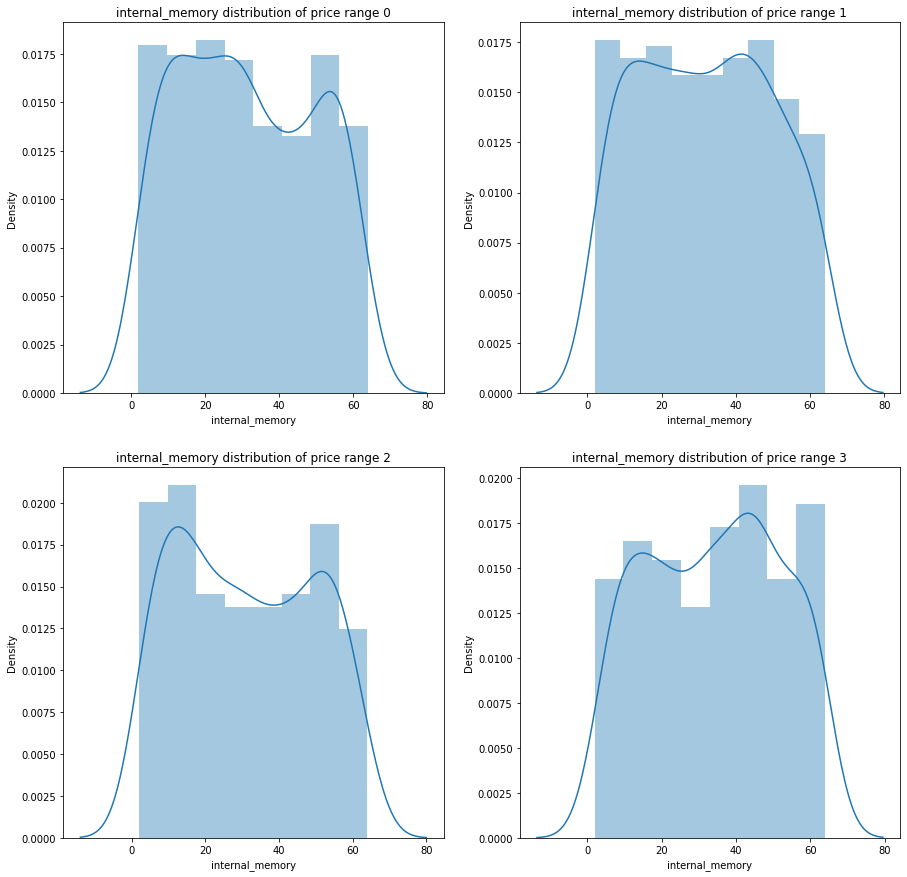

In [44]:
price_plot(df,'internal_memory')

1.   Price range 1 is having good internal memory size whe compared to other price ranges
2.  Still higher price range provides an efficient internal memory which is better than the lower ranges. In lower ranges an efficient internal memory is achieved through sacrificing some of the specs. 



### Number of cores based on price range

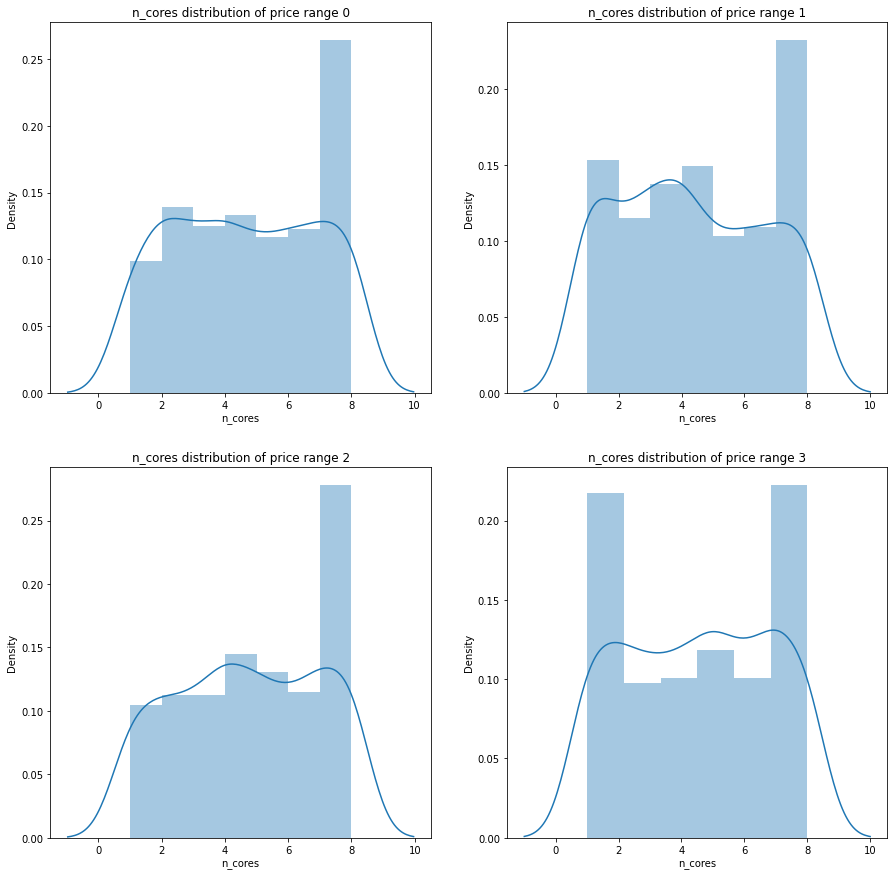

In [45]:
price_plot(df,'n_cores')

*   In all price range it is seen that 8 cores are produced maximum.
*   Price range 3 has a high number of single cores and octa cores.



### Talk Time based on price range

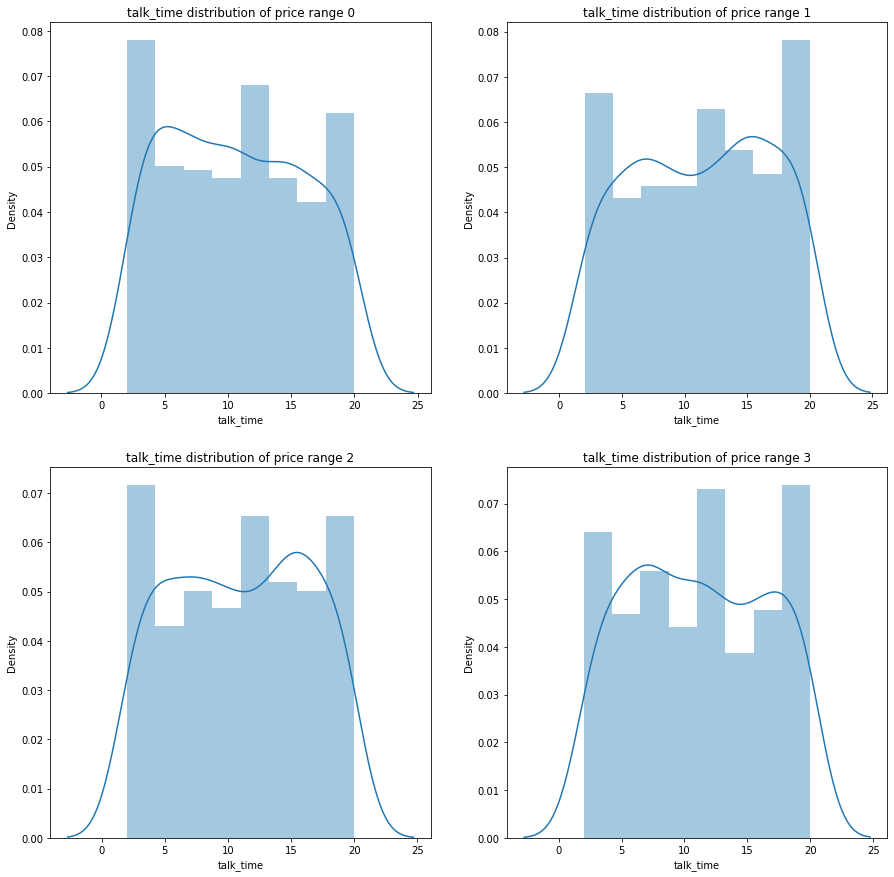

In [46]:
price_plot(df,'talk_time')

There is not much difference seen in these graphs.

### Pixel width distribution based on price range

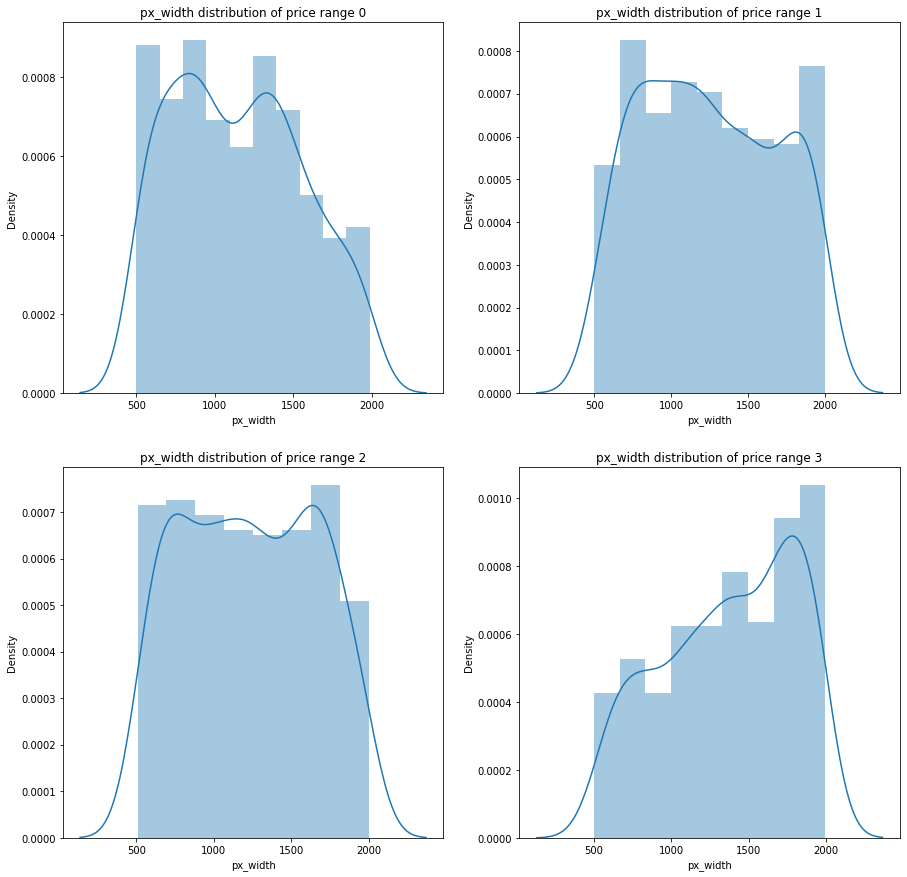

In [47]:
price_plot(df,'px_width')

*   Price range 0 have low mobiles with 2k pixels whereas in price range 3 there are low mobiles with low pixels. Higher price range, higher pixels.
*   Price range 1 and 2 have normal distribution and they too have high pixels, not as much as price range 3 since price range 3 focuses on higher pixels. 



### Pixel height distribution based on price range

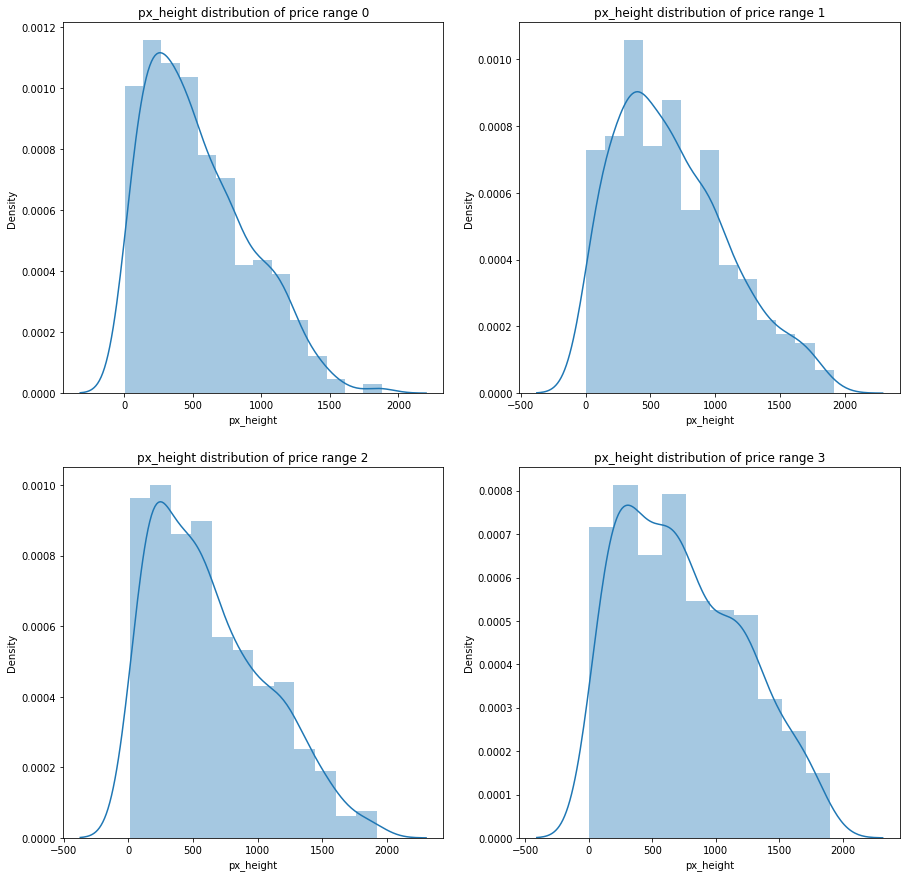

In [48]:
price_plot(df,'px_height')

There is relatively not much difference

# PPI distribution based on price range

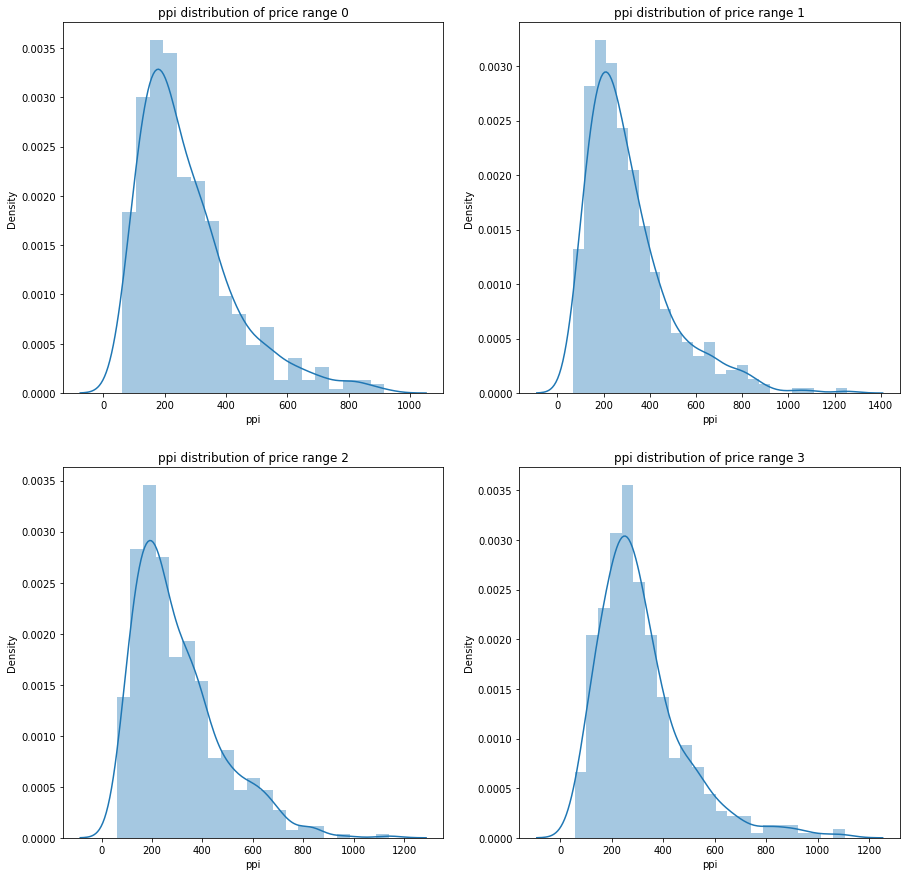

In [49]:
price_plot(df,'ppi')

There is not much difference

### 3G countplot based on price range

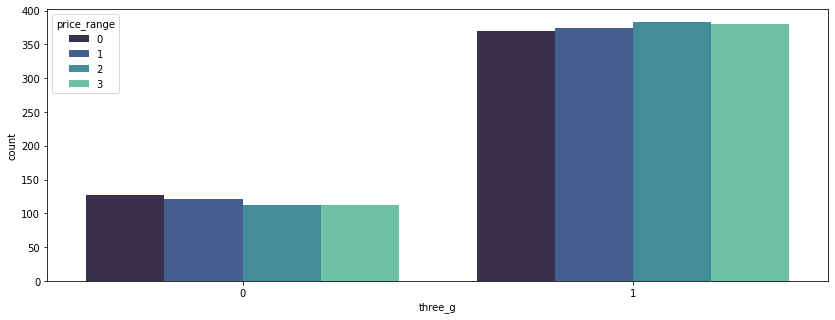

In [50]:
plt.figure(figsize = (14, 5))
sns.countplot(df['three_g'], palette = 'mako', hue = df['price_range'])

*   Mobiles with 3G tech is more.
*   Price range 1 have the most number of mobiles, still doesn't make any difference



### 4G countplot based on price range

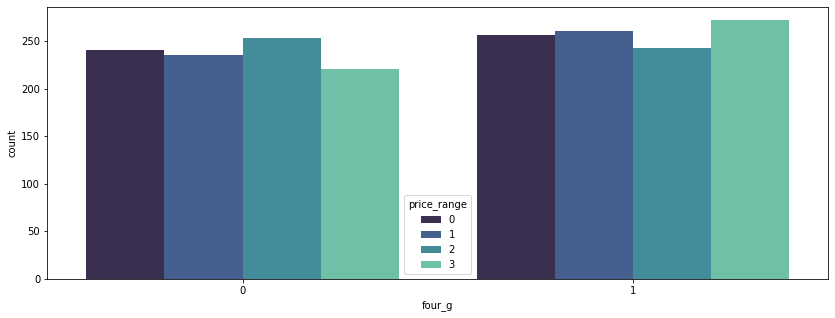

In [51]:
plt.figure(figsize = (14, 5))
sns.countplot(df['four_g'], palette = 'mako', hue = df['price_range'])

*   4G is relatively new tech for this dataset therefore almost 50:50.
*   It is clearly evident that price range 3 has more number of 4G mobiles.



### Countplot based on number of cores per price range

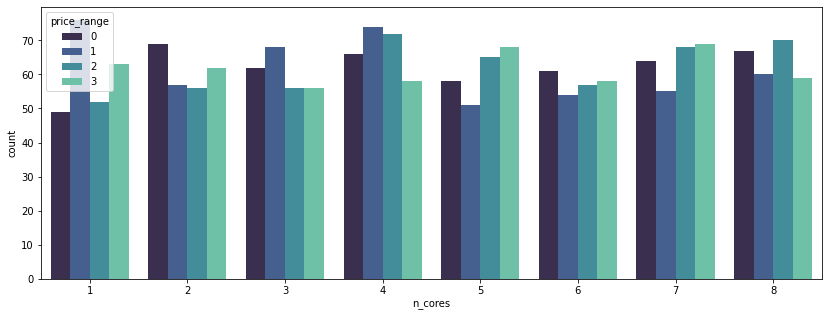

In [52]:
plt.figure(figsize = (14, 5))
sns.countplot(df['n_cores'], palette = 'mako', hue = df['price_range'])

# Bivariate Analysis

### RAM size v/s Price Range

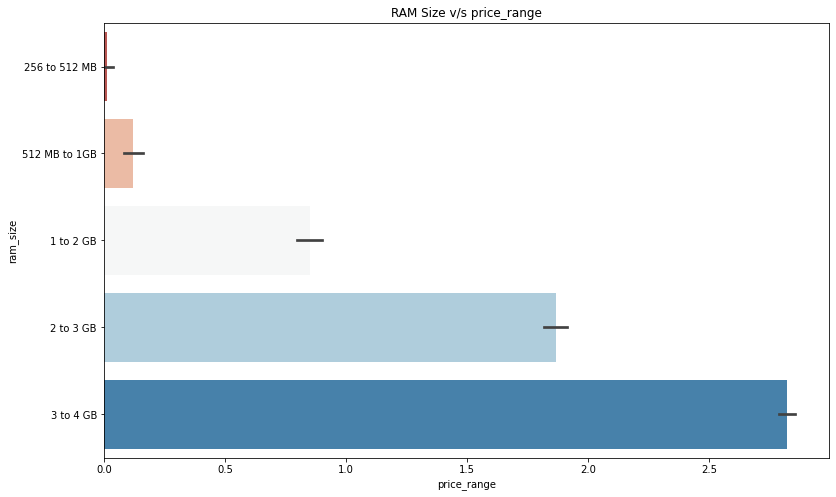

In [53]:
  # Bar plot for ram_size v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title("RAM Size v/s price_range")
  sns.barplot(df['price_range'],df['ram_size'], palette = 'RdBu')



*   The price range increases as RAM increase.
*   It appears that RAMs in the range of 3 to 4 GB is available at all price ranges.

*   Upto 1 GB there are very small number of mobiles, these may be basic mobiles.





### Battery Power v/s Price Range

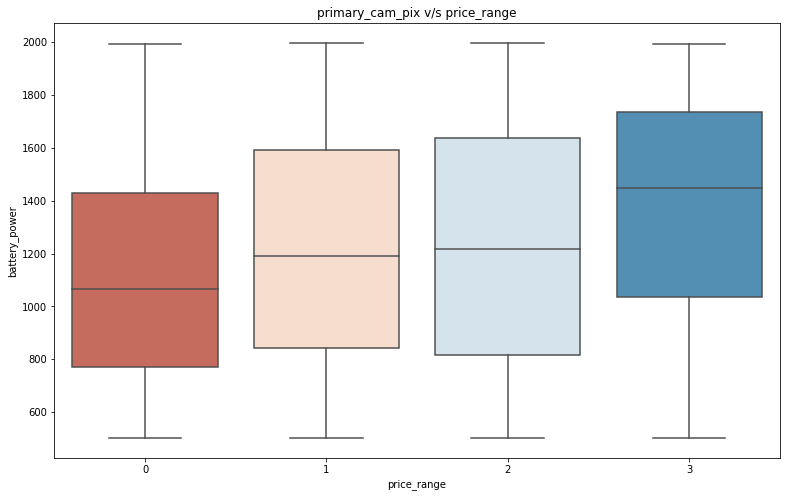

In [54]:
# Box plot for battery_power v/s price_range
plt.figure(figsize = (13, 8))
plt.title(col+" v/s price_range")
sns.boxplot(df['price_range'],df['battery_power'], palette = 'RdBu')



*   As the price range increases the battery range too increases.
*   Under price range 0, most of the mobiles have battery ranging from 800 to 1.4 mAh
*  Under price range 1, most of the mobiles have battery ranging around 900 to 1.58 mAh
*  Under price range 2, most of the mobiles have battery ranging from 800 to 1.6 mAh
*  Under price range 3, most of the mobiles have battery ranging around 1 mAh to 1.7 mAh





### Cores v/s Price Range

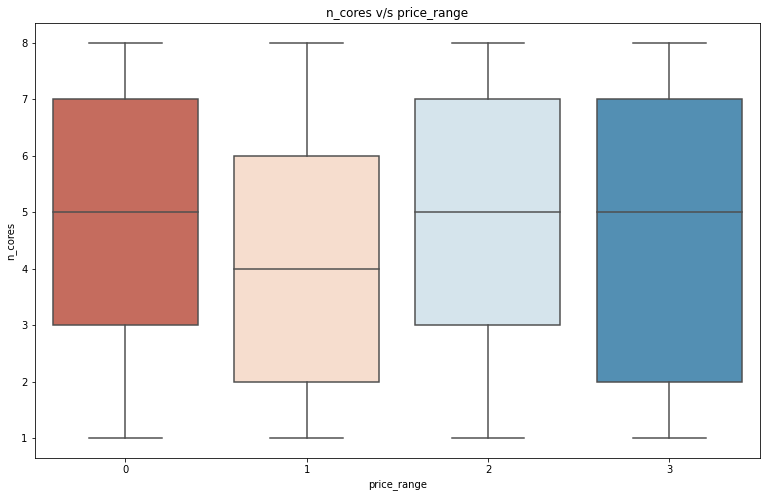

In [55]:
  # Box plot for n_cores v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title("n_cores v/s price_range")
  sns.boxplot(df['price_range'],df['n_cores'], palette = 'RdBu')

*   As the price range increases, the number of mobiles with multiple cores increases.
*   Under price range 0, most of the mobiles have cores ranging from 3 to 7
*   Under price range 1, most of the mobiles have cores ranging from 2 to 6
*   Under price range 2, most of the mobiles have cores ranging from 3 to 7
*   Under price range 3, most of the mobiles have cores ranging from 2 to 7.
*   Higher price range with low cores signifies it has other better specs that leads to this price.




### Primary camera pixels v/s Price Range

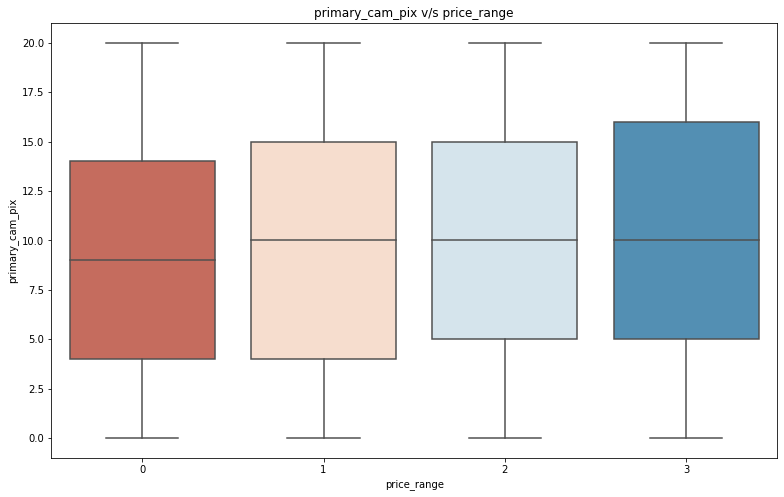

In [56]:
  # Box plot for primary_cam_pix v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title(col+" v/s price_range")
  sns.boxplot(df['price_range'],df['primary_cam_pix'], palette = 'RdBu')

*   As price range increases the pixels too increase.
*   Mobiles under price range 0 have pixel range from 4 to 15 MP, which is better but still other specs might be low like RAM, internal memory etc.
*   Higher the price range better pixels with better specs.



### Front Camera Pixels v/s Price Range

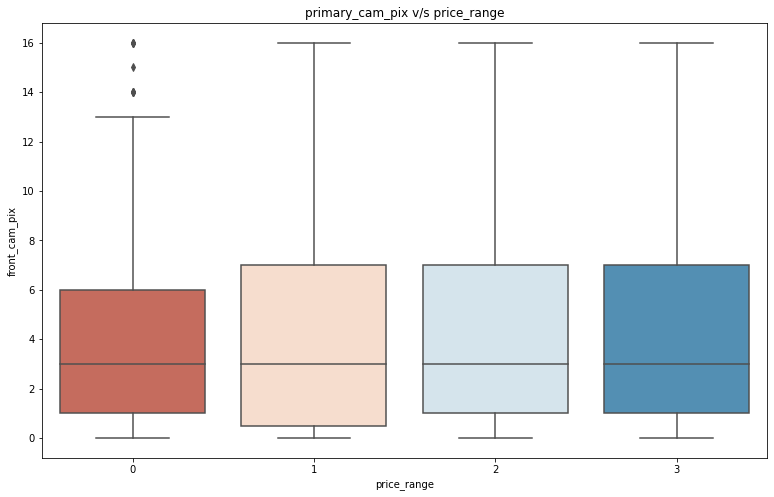

In [57]:
  # Box plot for front_cam_pix v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title(col+" v/s price_range")
  sns.boxplot(df['price_range'],df['front_cam_pix'], palette = 'RdBu')

*   There are outliers present in all price range.
*   As usual lower price range having higher pixel rate might have other low quality specs. Reverse is also true.



### Internal Memory v/s Price Range

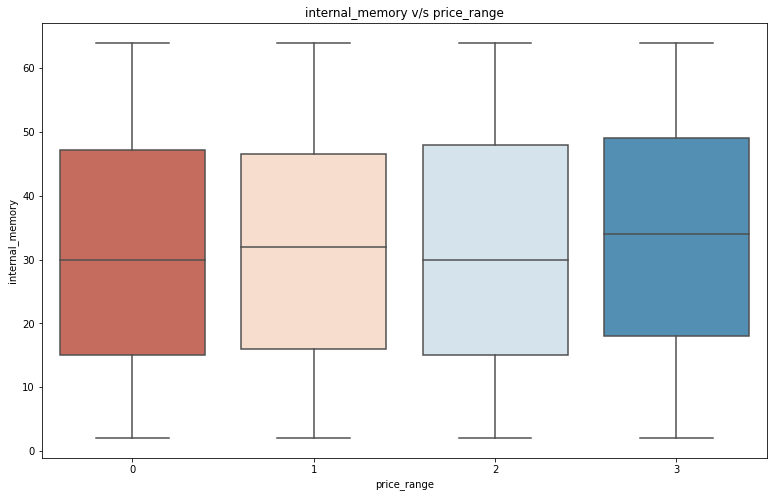

In [58]:
  # Box plot for internal_memory v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title("internal_memory v/s price_range")
  sns.boxplot(df['price_range'],df['internal_memory'], palette = 'RdBu')

*  From the plot, it is seen that most of the mobiles have same internal memory size for all price ranges, little higher internal memory incase of higher price range.



### PPI v/s Price Range

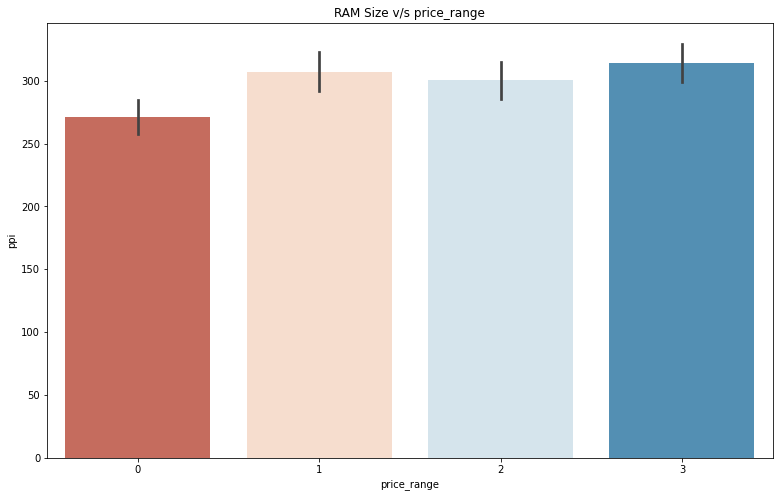

In [59]:
# Bar plot for ram_size v/s price_range
plt.figure(figsize = (13, 8))
plt.title("RAM Size v/s price_range")
sns.barplot(df['price_range'],df['ppi'], palette = 'RdBu')

*   It is seen here that price range 3 provide higher PPI than the rest.
*   PPI in price range 1 is almost equal to price range 3.
*   If you need only pixel quality and not opting for other better specs, this is your choice.
*   Most of the time higher price range provide some very good specs







### Display size v/s Price Range

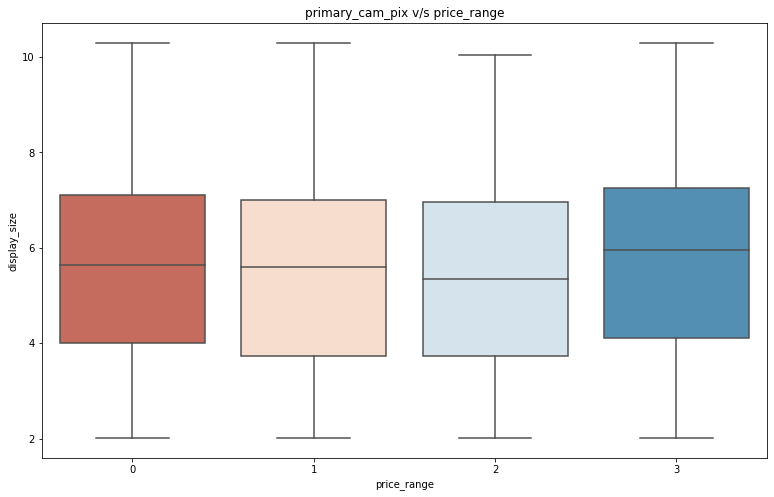

In [60]:
  # Box plot for display_size v/s price_range
  plt.figure(figsize = (13, 8))
  plt.title(col+" v/s price_range")
  sns.boxplot(df['price_range'],df['display_size'], palette = 'RdBu')

*   From the plot, it is seen that most of the mobiles have same display size for all price ranges, little higher display size incase of higher price range.



# Multivariate Analysis

## Price Range, Battery Power and RAM Size

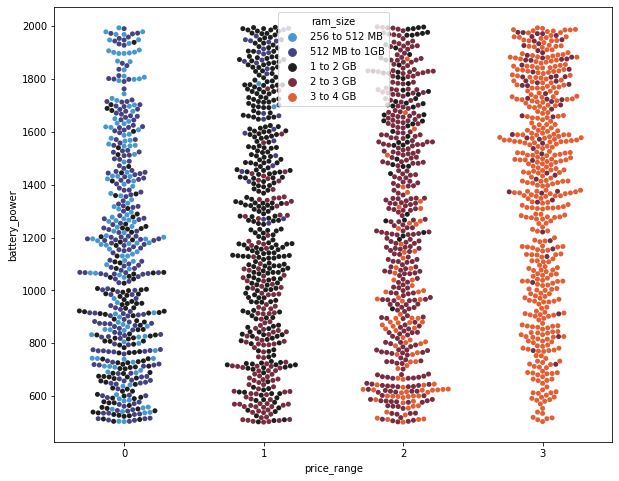

In [61]:
# Swarmplot using price_range, battery_power and ram_size variables
plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['battery_power'], hue = df['ram_size'], palette = 'icefire')

1.   Most mobiles under the price range 0 have RAM size ranging from 256MB to 1 GB and have battery upto 1100 mAh. Very small numbers have battery upto 2000 mAh.
2.   Most mobiles under the price range 1 have RAM size ranging from 1GB to 3GB and have battery upto 2000 mAh.
1.   Price range 3 mobiles have RAM size ranging from 3GB to 4 GB and have battery upto 2000 mAh.




### Price Range, Processor cores and Clock speed

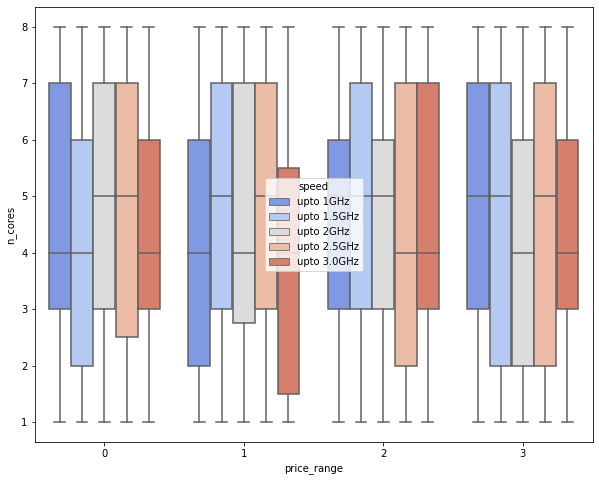

In [62]:
# Swarmplot using price_range, RAM and speed variables
plt.figure(figsize = (10, 8))
sns.boxplot(df['price_range'], df['n_cores'], hue = df['speed'], palette = 'coolwarm')

*   Under price range 0, it is observed most of the mobiles have cores from 3 to 7.
*   Under price range 1, it is observed that most of the mobiles have cores 2 to 7
*   Under price range 2, it is observed that almost all mobiles have 3 cores and has a maximum of 7 cores.
*   Under price range 3, it is observed that most of the mobiles have dual core and maximum of 7 cores. 
*   Octa core is seen in all price range.
*   Price range 2 offers clock speed from 2.5 to 3 GHz for maximum number of cores.
*   Price range 3 offers clock speed from 2 to 3 GHz for maximum number of cores.
*   Price range 2 offers good clock speed when compared with other price ranges.











### Price Range, Display Size and Front Camera

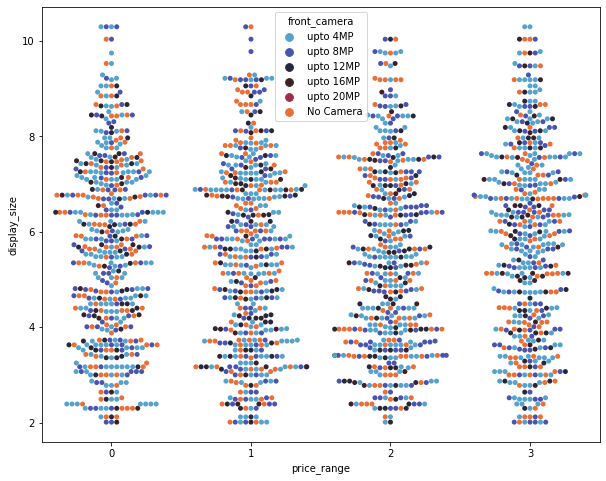

In [63]:
# Swarmplot using price_range, display_size and front_camera variables
plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['display_size'], hue = df['front_camera'], palette = 'icefire')

*   Price range 0 offers a maximum of 6 inches display and upto 8 MP camera.
*   Price range 1 offers a maximum of 6.5 inches display and upto 12 MP camera.
*   Price range 2 offers a maximum of 7 inches display and upto 16 MP camera
*   Price range 3 offers a maximum of 8 inches display and upto 20 MP camera
*   All price ranges have mobiles with no camera
*   All price ranges have mobiles with display size upto 10 inches and also more.







### Price Range, Display Size and Primary Camera

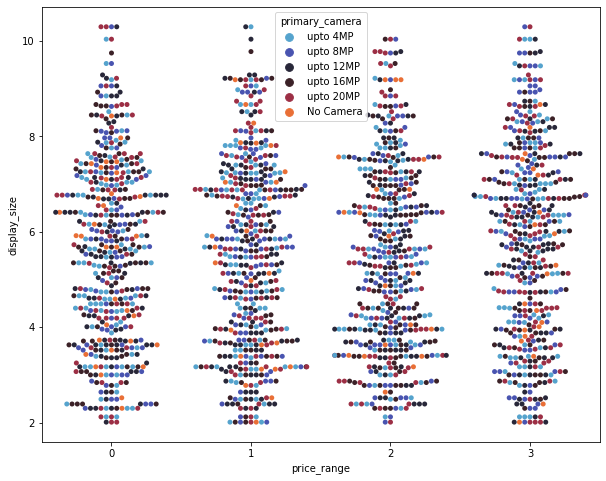

In [64]:
# Swarmplot using price_range, display_size and primary_camera variables
plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['display_size'], hue = df['primary_camera'], palette = 'icefire')



*   Price range 0 offers a maximum of 6 inches display and upto 8 MP camera.
*   Price range 1 offers a maximum of 6.5 inches display and upto 12 MP camera.
*   Price range 2 offers a maximum of 7 inches display and upto 16 MP camera
*   Price range 3 offers a maximum of 8 inches display and upto 20 MP camera
*   All price ranges have mobiles with no camera
*   All price ranges have mobiles with display size upto 10 inches and also more.











# Price Range, PPI and Screen Type

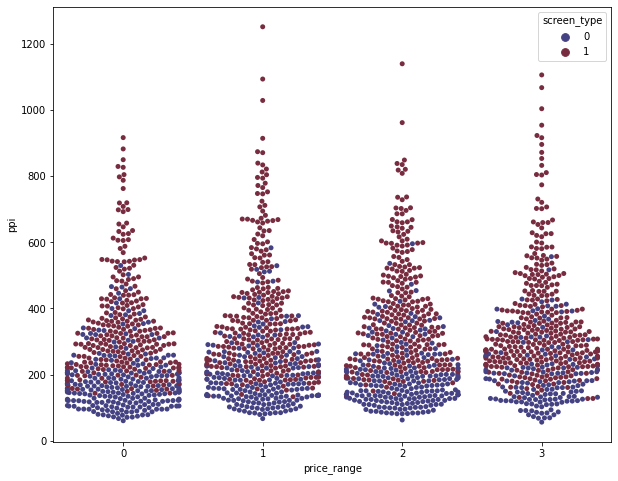

In [65]:
# Swarmplot using price_range, ppi and screen_type variables
plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['ppi'], hue = df['screen_type'], palette = 'icefire')

*   More mobiles that are not HD are found in price range 0 and 2.
*   Price range 1 have mobile that crosses 1200 PPI which might be an outlier in this case.
*   Price range 3 have more mobiles with high PPI and price range 2 is relatively low.




# Correlation Analysis

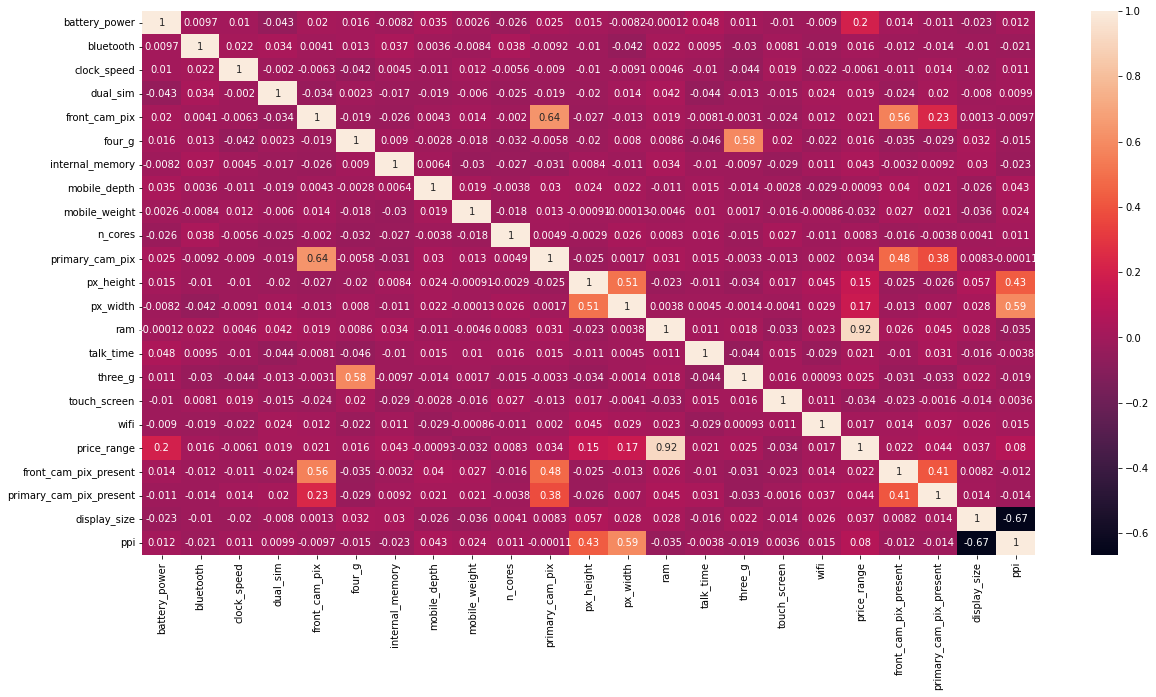

In [66]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

Some features are removed due to multicollinearity.

In [67]:
# Feature Selection
cols = list(set(df.columns) - {'ram_size','speed','primary_camera','front_camera','px_height','px_width','front_cam_pix_present','primary_cam_pix_present','display_size','four_g','price_range','front_cam_pix'})
cols

['ppi',
 'touch_screen',
 'three_g',
 'internal_memory',
 'slim',
 'wifi',
 'mobile_weight',
 'n_cores',
 'bluetooth',
 'dual_sim',
 'battery_power',
 'talk_time',
 'ram',
 'screen_type',
 'primary_cam_pix',
 'mobile_depth',
 'clock_speed']

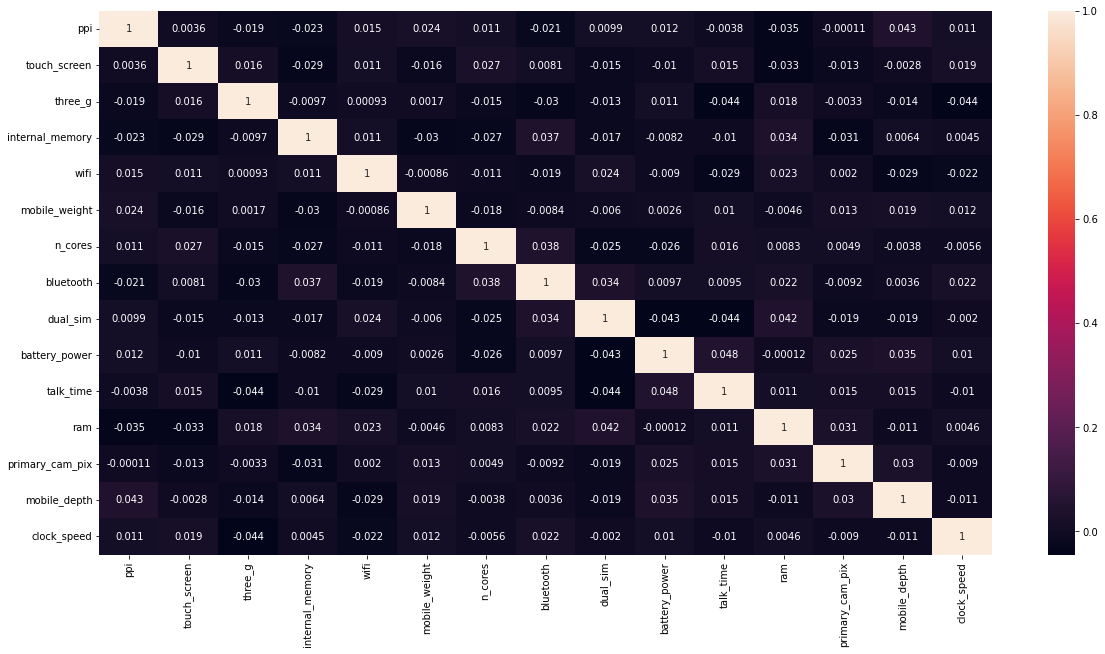

In [68]:
plt.figure(figsize = (20, 10))
sns.heatmap(df[cols].corr(), annot = True)

In [69]:
# Independent variables
x = df[cols]
# Dependent variables
y = df['price_range']

In [70]:
x.head()

,ppi,touch_screen,three_g,internal_memory,slim,wifi,mobile_weight,n_cores,bluetooth,dual_sim,battery_power,talk_time,ram,screen_type,primary_cam_pix,mobile_depth,clock_speed
0,168.433074,0,0,7,0,1,188,2,0,0,842,19,2549,0,2,0.6,2.2
1,321.220673,1,1,53,0,0,136,3,1,1,1021,7,2631,1,6,0.7,0.5
2,484.246934,1,1,41,0,0,145,5,1,1,563,9,2603,1,6,0.9,0.5
3,306.911944,0,1,10,0,0,131,6,1,0,615,11,2769,1,9,0.8,2.5
4,526.523307,1,1,44,0,0,141,2,1,0,1821,15,1411,1,14,0.6,1.2


In [71]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1584, 17)
(396, 17)


### Model Implementation

In [72]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_curve
%matplotlib inline

In [73]:
clf = LogisticRegression(multi_class='ovr',fit_intercept=True, random_state=0, max_iter=10000)
clf.fit(x, y)

LogisticRegression(max_iter=10000, multi_class='ovr', random_state=0)

In [74]:
clf.coef_

array([[-4.82210167e-03,  1.09897212e-01,  6.79362434e-02,
        -1.40801555e-02, -5.17706306e-02,  3.05538427e-01,
         1.01431291e-02,  9.13225097e-02,  2.66662527e-01,
         1.21002180e-01, -6.49883604e-03,  1.01231380e-02,
        -1.03959429e-02, -2.65302498e+00,  2.67660814e-02,
        -1.92156411e-01,  2.33498740e-01],
       [ 5.75043201e-04,  1.19981418e-01, -8.64843867e-03,
         2.48682080e-04, -1.09380912e-02,  3.40234481e-02,
        -4.00881615e-05, -5.89460697e-02,  2.30756853e-02,
         7.20452329e-02, -1.31616073e-04,  1.73063627e-02,
        -5.34233925e-04, -2.01342712e-01,  1.85915529e-03,
         2.19903026e-01, -8.17719982e-02],
       [ 7.39844046e-04, -1.25345709e-01, -8.08847865e-02,
        -7.85414466e-03, -1.58599778e-01, -9.55212597e-02,
         7.64667272e-04,  2.10463841e-02, -1.27272626e-01,
        -1.91662332e-01, -2.03903445e-04, -6.49899170e-03,
         5.24134335e-04, -4.45374253e-01, -3.13201106e-03,
        -5.82640146e-01, -5.9

In [75]:
clf.intercept_

array([ 2.10321446e+01,  4.40917865e-03, -1.11063870e+00, -3.84891006e+01])

In [76]:
# Get the predicted probabilities
log_train_preds = clf.predict_proba(X_train)
log_test_preds = clf.predict_proba(X_test)

In [77]:
log_train_preds

array([[4.79084884e-09, 1.32785512e-01, 4.40529152e-01, 4.26685331e-01],
       [5.59606382e-04, 3.80186638e-01, 6.19212562e-01, 4.11938260e-05],
       [4.26167957e-01, 3.26758088e-01, 2.47073943e-01, 1.19982013e-08],
       ...,
       [1.05478201e-04, 6.74295601e-01, 3.25464890e-01, 1.34030565e-04],
       [3.49029957e-01, 4.36104881e-01, 2.14864975e-01, 1.87004727e-07],
       [2.39344463e-10, 7.75757406e-02, 3.49515501e-01, 5.72908758e-01]])

In [78]:
log_test_preds

array([[2.07402807e-02, 4.56660634e-01, 5.22598489e-01, 5.96386504e-07],
       [6.48978777e-01, 2.79762002e-01, 7.12592215e-02, 7.52711680e-11],
       [5.72826543e-04, 4.41193359e-01, 5.58151156e-01, 8.26584533e-05],
       ...,
       [6.64905008e-01, 1.93871562e-01, 1.41223430e-01, 3.02102248e-10],
       [5.26943545e-01, 3.41431763e-01, 1.31624657e-01, 3.40623775e-08],
       [1.07672580e-05, 4.76467532e-01, 5.19792483e-01, 3.72921728e-03]])

In [79]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [80]:
train_class_preds

array([2, 2, 0, ..., 1, 1, 3])

In [81]:
# Classification report for Train Data
print(classification_report(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       398
           1       0.74      0.70      0.72       402
           2       0.75      0.71      0.73       404
           3       0.91      0.97      0.94       380

    accuracy                           0.83      1584
   macro avg       0.83      0.84      0.83      1584
weighted avg       0.83      0.83      0.83      1584



In [82]:
# Classification report for Train Data
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        98
           1       0.72      0.65      0.68        93
           2       0.69      0.64      0.67        92
           3       0.89      0.95      0.92       113

    accuracy                           0.81       396
   macro avg       0.80      0.80      0.80       396
weighted avg       0.80      0.81      0.81       396



In [83]:
# Calculating classification metrics on train and test data

#Train Data
log_train_accuracy = accuracy_score(y_train,train_class_preds)
log_train_recall = recall_score(y_train,train_class_preds, average='macro')
log_train_precision = precision_score(y_train,train_class_preds, average='macro')
log_train_f1_score = f1_score(y_train,train_class_preds, average='macro')
log_train_roc_auc = roc_auc_score(y_train,log_train_preds,multi_class='ovr')

#Test Data
log_test_accuracy = accuracy_score(y_test,test_class_preds)
log_test_recall = recall_score(y_test,test_class_preds, average='macro')
log_test_precision = precision_score(y_test,test_class_preds, average='macro')
log_test_f1_score = f1_score(y_test,test_class_preds, average='macro')
log_test_roc_auc = roc_auc_score(y_test,log_test_preds,multi_class='ovr')

In [84]:
print("The accuracy on train dataset is", log_train_accuracy)
print("The recall score on train dataset is", log_train_recall)
print("The precision on train dataset is", log_train_precision)
print("The F1 score on train dataset is", log_train_f1_score)
print("The ROC AUC on train dataset is", log_train_roc_auc)

The accuracy on train dataset is 0.8339646464646465
The recall score on train dataset is 0.8362865162040723
The precision on train dataset is 0.8305564944173944
The F1 score on train dataset is 0.8326800103919397
The ROC AUC on train dataset is 0.9533719755308414


In [85]:
print("The accuracy on test dataset is", log_test_accuracy)
print("The recall score on test dataset is", log_test_recall)
print("The precision on test dataset is", log_test_precision)
print("The F1 score on test dataset is", log_test_f1_score)
print("The ROC AUC score on test dataset is", log_test_roc_auc)

The accuracy on test dataset is 0.8106060606060606
The recall score on test dataset is 0.8006890120294913
The precision on test dataset is 0.797076377405045
The F1 score on test dataset is 0.7973174702986361
The ROC AUC score on test dataset is 0.9448408675545967


In [86]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [87]:
train_cm

array([[384,  14,   0,   0],
       [ 35, 283,  84,   0],
       [  0,  80, 286,  38],
       [  0,   3,   9, 368]])

In [88]:
test_cm

array([[ 95,   3,   0,   0],
       [ 13,  60,  20,   0],
       [  0,  20,  59,  13],
       [  0,   0,   6, 107]])

Text(0.5, 1.0, 'Logistic Regression Train Data Confusion Matrix')

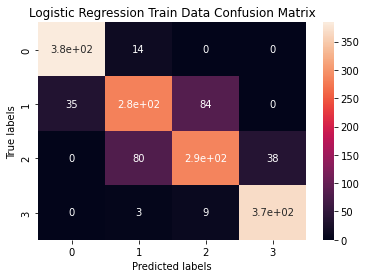

In [89]:
# Confusion matrix for train
ax= plt.subplot()
sns.heatmap(train_cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Train Data Confusion Matrix')

Text(0.5, 1.0, 'Logistic Regression Test Data Confusion Matrix')

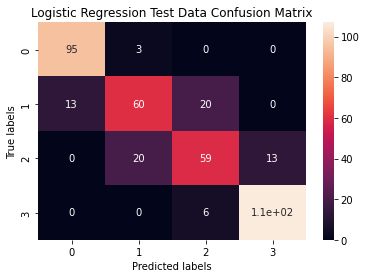

In [90]:
# Confusion Matrix for test data
ax= plt.subplot()
sns.heatmap(test_cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Test Data Confusion Matrix')

### Logistic Regression Cross Validation

In [91]:
from sklearn.linear_model import LogisticRegressionCV

In [92]:
# Initializing object
log = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
# Predictions and probabilities
log_cv_train_pred = log.predict(X_train)
log_cv_test_pred = log.predict(X_test)
log_cv_train_pred_proba = log.predict_proba(X_train)
log_cv_test_pred_proba = log.predict_proba(X_test)

In [93]:
# Calculating classification metrics on train and test data

#Train Data
logcv_train_accuracy = accuracy_score(y_train,log_cv_train_pred)
logcv_train_recall = recall_score(y_train,log_cv_train_pred, average='macro')
logcv_train_precision = precision_score(y_train,log_cv_train_pred, average='macro')
logcv_train_f1_score = f1_score(y_train,log_cv_train_pred, average='macro')
logcv_train_roc_auc = roc_auc_score(y_train,log_cv_train_pred_proba,multi_class='ovr')

#Test Data
logcv_test_accuracy = accuracy_score(y_test,log_cv_test_pred)
logcv_test_recall = recall_score(y_test,log_cv_test_pred, average='macro')
logcv_test_precision = precision_score(y_test,log_cv_test_pred, average='macro')
logcv_test_f1_score = f1_score(y_test,log_cv_test_pred, average='macro')
logcv_test_roc_auc = roc_auc_score(y_test,log_cv_test_pred_proba,multi_class='ovr')

In [94]:
# Printing Train Data Metrics
print("The accuracy on train dataset is", logcv_train_accuracy)
print("The recall score on train dataset is", logcv_train_recall)
print("The precision on train dataset is", logcv_train_precision)
print("The F1 score on train dataset is", logcv_train_f1_score)
print("The ROC AUC on train dataset is", logcv_train_roc_auc)

The accuracy on train dataset is 0.6679292929292929
The recall score on train dataset is 0.6699648119134192
The precision on train dataset is 0.6688578954544557
The F1 score on train dataset is 0.6688205062742453
The ROC AUC on train dataset is 0.8938887965612133


In [95]:
# Printing Test Data Metrics
print("The accuracy on test dataset is", logcv_test_accuracy)
print("The recall score on test dataset is", logcv_test_recall)
print("The precision on test dataset is", logcv_test_precision)
print("The F1 score on test dataset is", logcv_test_f1_score)
print("The ROC AUC score on test dataset is", logcv_test_roc_auc)

The accuracy on test dataset is 0.6767676767676768
The recall score on test dataset is 0.6698352599364907
The precision on test dataset is 0.6694691470054447
The F1 score on test dataset is 0.6694332545459781
The ROC AUC score on test dataset is 0.8969473495708763


In [96]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [97]:
train_cm

array([[384,  14,   0,   0],
       [ 35, 283,  84,   0],
       [  0,  80, 286,  38],
       [  0,   3,   9, 368]])

In [98]:
test_cm

array([[ 95,   3,   0,   0],
       [ 13,  60,  20,   0],
       [  0,  20,  59,  13],
       [  0,   0,   6, 107]])

Text(0.5, 1.0, 'Logistic Regression Train Data Confusion Matrix')

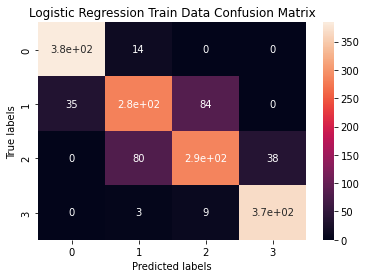

In [99]:
# Confusion matrix for train
ax= plt.subplot()
sns.heatmap(train_cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Train Data Confusion Matrix')

Text(0.5, 1.0, 'Logistic Regression Train Data Confusion Matrix')

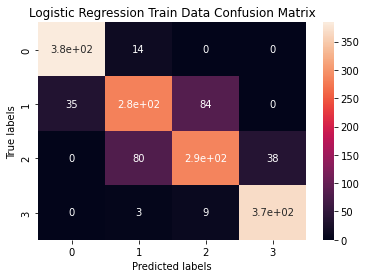

In [100]:
# Confusion matrix for test
ax= plt.subplot()
sns.heatmap(train_cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Train Data Confusion Matrix')

# K Nearest Neighbours

In [101]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV
# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knnc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knnc, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(x,y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [103]:
grid.best_params_

{'n_neighbors': 18}

In [104]:
grid.best_score_

0.8484848484848484

In [105]:
# Creating object and fitting the model
knnc= KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)
knnc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [106]:
#Predicting the test set result  
y_pred_train = knnc.predict_proba(X_train)
y_pred_test= knnc.predict_proba(X_test)  

In [107]:
y_pred_train

array([[0.        , 0.        , 0.8       , 0.2       ],
       [0.        , 0.8       , 0.2       , 0.        ],
       [0.46666667, 0.53333333, 0.        , 0.        ],
       ...,
       [0.        , 0.8       , 0.2       , 0.        ],
       [0.53333333, 0.46666667, 0.        , 0.        ],
       [0.        , 0.        , 0.26666667, 0.73333333]])

In [108]:
y_pred_test

array([[0.        , 0.93333333, 0.06666667, 0.        ],
       [0.96666667, 0.03333333, 0.        , 0.        ],
       [0.        , 0.63333333, 0.36666667, 0.        ],
       ...,
       [0.93333333, 0.06666667, 0.        , 0.        ],
       [0.83333333, 0.16666667, 0.        , 0.        ],
       [0.        , 0.3       , 0.66666667, 0.03333333]])

In [109]:
train_class_pred_knn = clf.predict(X_train)
test_class_pred_knn = clf.predict(X_test)

In [110]:
# Confusion Matrix for Train and Test
cm_train = confusion_matrix(y_train,train_class_pred_knn)
cm_test = confusion_matrix(y_test,test_class_pred_knn)

In [111]:
cm_train

array([[384,  14,   0,   0],
       [ 35, 283,  84,   0],
       [  0,  80, 286,  38],
       [  0,   3,   9, 368]])

In [112]:
cm_test

array([[ 95,   3,   0,   0],
       [ 13,  60,  20,   0],
       [  0,  20,  59,  13],
       [  0,   0,   6, 107]])

In [113]:
#Train Data
knn_train_accuracy = accuracy_score(y_train,train_class_pred_knn)
knn_train_recall = recall_score(y_train,train_class_pred_knn, average='macro')
knn_train_precision = precision_score(y_train,train_class_pred_knn, average='macro')
knn_train_f1_score = f1_score(y_train,train_class_pred_knn, average='macro')
knn_train_roc_auc = roc_auc_score(y_train,y_pred_train,multi_class='ovr')

#Test Data
knn_test_accuracy = accuracy_score(y_test,test_class_pred_knn)
knn_test_recall = recall_score(y_test,test_class_pred_knn, average='macro')
knn_test_precision = precision_score(y_test,test_class_pred_knn, average='macro')
knn_test_f1_score = f1_score(y_test,test_class_pred_knn, average='macro')
knn_test_roc_auc = roc_auc_score(y_test,y_pred_test,multi_class='ovr')

In [114]:
# Printing Train Metrics
print("The accuracy on train dataset is", knn_train_accuracy)
print("The recall score on train dataset is", knn_train_recall)
print("The precision on train dataset is", knn_train_precision)
print("The F1 score on train dataset is", knn_train_f1_score)
print("The ROC AUC on train dataset is", knn_train_roc_auc)

The accuracy on train dataset is 0.8339646464646465
The recall score on train dataset is 0.8362865162040723
The precision on train dataset is 0.8305564944173944
The F1 score on train dataset is 0.8326800103919397
The ROC AUC on train dataset is 0.9756431579747474


In [115]:
# Printing Test Metrics
print("The accuracy on train dataset is", knn_test_accuracy)
print("The recall score on train dataset is", knn_test_recall)
print("The precision on train dataset is", knn_test_precision)
print("The F1 score on train dataset is", knn_test_f1_score)
print("The ROC AUC on train dataset is", knn_test_roc_auc)

The accuracy on train dataset is 0.8106060606060606
The recall score on train dataset is 0.8006890120294913
The precision on train dataset is 0.797076377405045
The F1 score on train dataset is 0.7973174702986361
The ROC AUC on train dataset is 0.9734147785481775


In [116]:
# Classification report for Train Data
print(classification_report(y_train,train_class_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       398
           1       0.74      0.70      0.72       402
           2       0.75      0.71      0.73       404
           3       0.91      0.97      0.94       380

    accuracy                           0.83      1584
   macro avg       0.83      0.84      0.83      1584
weighted avg       0.83      0.83      0.83      1584



In [117]:
# Classification report for Test Data
print(classification_report(y_test,test_class_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        98
           1       0.72      0.65      0.68        93
           2       0.69      0.64      0.67        92
           3       0.89      0.95      0.92       113

    accuracy                           0.81       396
   macro avg       0.80      0.80      0.80       396
weighted avg       0.80      0.81      0.81       396



Text(0.5, 1.0, 'Confusion Matrix')

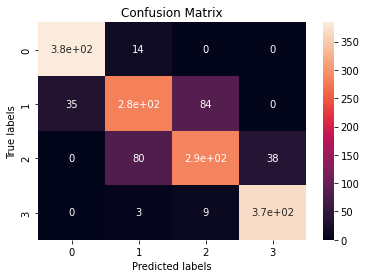

In [118]:
# Get the confusion matrix for both train and test
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax) #annot=True to annotate cells
# Train Data
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

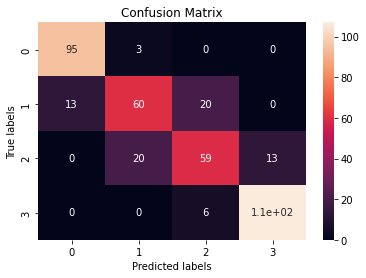

In [119]:
# Test Data
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Support Vector Machine

In [120]:
# Importing SVM
from sklearn import svm
# Creating object
svm_cls = svm.SVC(decision_function_shape='ovr',probability=True)

In [121]:
# Fitting the model
svm_cls.fit(x,y)

SVC(probability=True)

In [122]:
# Making predictions on train and test data
svm_train_class_preds = svm_cls.predict(X_train)
svm_test_class_preds = svm_cls.predict(X_test)
# Get the probabilities on train and test
svm_train_proba = svm_cls.predict_proba(X_train)
svm_test_proba = svm_cls.predict_proba(X_test)

In [123]:
#Train Data
svm_train_accuracy = accuracy_score(y_train,svm_train_class_preds)
svm_train_recall = recall_score(y_train,svm_train_class_preds, average='macro')
svm_train_precision = precision_score(y_train,svm_train_class_preds, average='macro')
svm_train_f1_score = f1_score(y_train,svm_train_class_preds, average='macro')
svm_train_roc_auc = roc_auc_score(y_train,svm_train_proba,multi_class='ovr')

#Test Data
svm_test_accuracy = accuracy_score(y_test,svm_test_class_preds)
svm_test_recall = recall_score(y_test,svm_test_class_preds, average='macro')
svm_test_precision = precision_score(y_test,svm_test_class_preds, average='macro')
svm_test_f1_score = f1_score(y_test,svm_test_class_preds, average='macro')
svm_test_roc_auc = roc_auc_score(y_test,svm_test_proba,multi_class='ovr')

In [124]:
# Printing Train Metrics
print("The accuracy on train dataset is", svm_train_accuracy)
print("The recall score on train dataset is", svm_train_recall)
print("The precision on train dataset is", svm_train_precision)
print("The F1 score on train dataset is", svm_train_f1_score)
print("The ROC AUC on train dataset is", svm_train_roc_auc)

The accuracy on train dataset is 0.8516414141414141
The recall score on train dataset is 0.8526374073239272
The precision on train dataset is 0.8505718616352858
The F1 score on train dataset is 0.8512946215018291
The ROC AUC on train dataset is 0.9745513092388569


In [125]:
# Printing Test Metrics
print("The accuracy on train dataset is", svm_test_accuracy)
print("The recall score on train dataset is", svm_test_recall)
print("The precision on train dataset is", svm_test_precision)
print("The F1 score on train dataset is", svm_test_f1_score)
print("The ROC AUC on train dataset is", svm_test_roc_auc)

The accuracy on train dataset is 0.8434343434343434
The recall score on train dataset is 0.8407611471402845
The precision on train dataset is 0.8407922936616506
The F1 score on train dataset is 0.8399292933761385
The ROC AUC on train dataset is 0.9746983359890788


In [126]:
# Get the confusion matrices for train and test
train_cm_svm = confusion_matrix(y_train,svm_train_class_preds)
test_cm_svm = confusion_matrix(y_test,svm_test_class_preds )

Text(0.5, 1.0, 'Confusion Matrix')

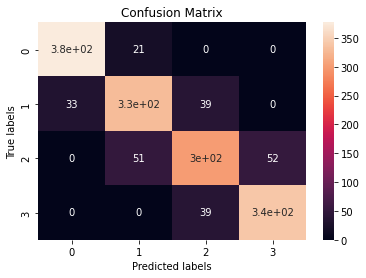

In [127]:
# SVM Confusion Matrix Train Data Plot
ax= plt.subplot()
sns.heatmap(train_cm_svm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

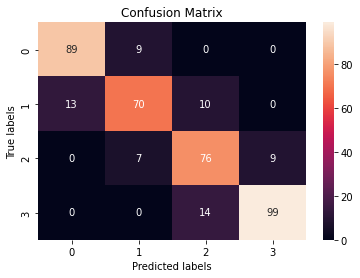

In [128]:
# SVM Confusion Matrix Test Data Plot
ax= plt.subplot()
sns.heatmap(test_cm_svm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Naive Bayes Classifier

In [129]:
# Importing Multinomial NaiveBayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x,y)

MultinomialNB()

In [130]:
# Predicting Train and Test Data
mnb_train_pred = mnb.predict(X_train)
mnb_test_pred = mnb.predict(X_test)
# Predicting probabilities for Train and Test Data
mnb_train_pred_proba = mnb.predict_proba(X_train)
mnb_test_pred_proba = mnb.predict_proba(X_test)

In [131]:
#Train Data
mnb_train_accuracy = accuracy_score(y_train,mnb_train_pred)
mnb_train_recall = recall_score(y_train,mnb_train_pred, average='macro')
mnb_train_precision = precision_score(y_train,mnb_train_pred, average='macro')
mnb_train_f1_score = f1_score(y_train,mnb_train_pred, average='macro')
mnb_train_roc_auc = roc_auc_score(y_train,mnb_train_pred_proba,multi_class='ovr')

#Test Data
mnb_test_accuracy = accuracy_score(y_test,mnb_test_pred)
mnb_test_recall = recall_score(y_test,mnb_test_pred, average='macro')
mnb_test_precision = precision_score(y_test,mnb_test_pred, average='macro')
mnb_test_f1_score = f1_score(y_test,mnb_test_pred, average='macro')
mnb_test_roc_auc = roc_auc_score(y_test,mnb_test_pred_proba,multi_class='ovr')

In [132]:
# Printing Train Metrics
print("The accuracy on train dataset is", svm_train_accuracy)
print("The recall score on train dataset is", svm_train_recall)
print("The precision on train dataset is", svm_train_precision)
print("The F1 score on train dataset is", svm_train_f1_score)
print("The ROC AUC on train dataset is", svm_train_roc_auc)

The accuracy on train dataset is 0.8516414141414141
The recall score on train dataset is 0.8526374073239272
The precision on train dataset is 0.8505718616352858
The F1 score on train dataset is 0.8512946215018291
The ROC AUC on train dataset is 0.9745513092388569


In [133]:
# Printing Test Metrics
print("The accuracy on train dataset is", svm_test_accuracy)
print("The recall score on train dataset is", svm_test_recall)
print("The precision on train dataset is", svm_test_precision)
print("The F1 score on train dataset is", svm_test_f1_score)
print("The ROC AUC on train dataset is", svm_test_roc_auc)

The accuracy on train dataset is 0.8434343434343434
The recall score on train dataset is 0.8407611471402845
The precision on train dataset is 0.8407922936616506
The F1 score on train dataset is 0.8399292933761385
The ROC AUC on train dataset is 0.9746983359890788


# Random Forest Classifier

Keeping all columns except categorical, since we are using Random Forest Classifier

In [134]:
# df.columns

In [135]:
# # Removing price range variable
# cols = list(set(df.columns) - {'ram_size','speed','primary_camera','front_camera','price_range'})
# # Independent variables
# x = df[cols]
# # Dependent variables
# y = df['price_range']

In [136]:
# from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 0)
# print(X_train.shape)
# print(X_test.shape)

In [137]:
# x.head()

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [140]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [141]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(x,y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [142]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=50)

In [143]:
rf_optimal_model = rf_grid.best_estimator_

In [144]:
rf_grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 50}

In [145]:
# Making predictions on train and test data
rf_train_class_preds = rf_optimal_model.predict(X_train)
rf_test_class_preds = rf_optimal_model.predict(X_test)
# Get the probabilities on train and test
rf_train_proba = rf_optimal_model.predict_proba(X_train)
rf_test_proba = rf_optimal_model.predict_proba(X_test)

In [146]:
len(rf_train_class_preds)

1584

In [147]:
rf_test_class_preds

array([1, 0, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 2, 2, 0, 2, 2, 0, 1, 3, 2, 3,
       3, 0, 3, 0, 3, 1, 1, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 3, 3, 1,
       0, 3, 0, 1, 0, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 1, 0, 2, 0, 0, 3,
       1, 2, 2, 3, 0, 1, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 3, 3, 3, 2, 0, 1, 1, 3, 3, 1, 2, 2, 0, 0, 3, 1, 2, 3, 1, 0,
       2, 0, 2, 3, 1, 3, 3, 0, 3, 3, 0, 2, 2, 3, 0, 0, 3, 2, 3, 1, 0, 0,
       1, 1, 3, 2, 0, 1, 1, 1, 3, 2, 0, 0, 2, 3, 3, 3, 2, 0, 1, 0, 0, 1,
       0, 0, 2, 2, 3, 1, 3, 3, 3, 3, 3, 1, 0, 0, 3, 1, 3, 3, 3, 0, 2, 0,
       1, 0, 0, 3, 0, 1, 0, 0, 1, 3, 2, 3, 2, 3, 3, 2, 0, 0, 0, 1, 0, 3,
       3, 2, 2, 1, 1, 2, 3, 1, 2, 2, 2, 2, 0, 1, 2, 1, 3, 0, 3, 0, 0, 2,
       3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 2, 1, 0, 1, 3, 0, 2, 2, 3, 0, 2, 2,
       0, 3, 1, 0, 3, 1, 1, 0, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 3,
       1, 2, 1, 2, 3, 2, 2, 0, 0, 1, 1, 0, 3, 3, 0, 2, 2, 3, 1, 3, 2, 1,
       3, 1, 0, 1, 2, 2, 0, 3, 3, 1, 0, 2, 3, 2, 0,

In [148]:
#Train Data
rf_train_accuracy = accuracy_score(y_train,rf_train_class_preds)
rf_train_recall = recall_score(y_train,rf_train_class_preds, average='macro')
rf_train_precision = precision_score(y_train,rf_train_class_preds, average='macro')
rf_train_f1_score = f1_score(y_train,rf_train_class_preds, average='macro')
rf_train_roc_auc = roc_auc_score(y_train,rf_train_proba,multi_class='ovr')

#Test Data
rf_test_accuracy = accuracy_score(y_test,rf_test_class_preds)
rf_test_recall = recall_score(y_test,rf_test_class_preds, average='macro')
rf_test_precision = precision_score(y_test,rf_test_class_preds, average='macro')
rf_test_f1_score = f1_score(y_test,rf_test_class_preds, average='macro')
rf_test_roc_auc = roc_auc_score(y_test,rf_test_proba,multi_class='ovr')

In [149]:
# Printing Train Metrics
print("The accuracy on train dataset is", rf_train_accuracy)
print("The recall score on train dataset is", rf_train_recall)
print("The precision on train dataset is", rf_train_precision)
print("The F1 score on train dataset is", rf_train_f1_score)
print("The ROC AUC on train dataset is", rf_train_roc_auc)

The accuracy on train dataset is 0.8453282828282829
The recall score on train dataset is 0.8471940944563219
The precision on train dataset is 0.8436936719560223
The F1 score on train dataset is 0.8440557071781334
The ROC AUC on train dataset is 0.9655265840698729


In [150]:
# Printing Test Metrics
print("The accuracy on test dataset is", rf_test_accuracy)
print("The recall score on test dataset is", rf_test_recall)
print("The precision on test dataset is", rf_test_precision)
print("The F1 score on test dataset is", rf_test_f1_score)
print("The ROC AUC on test dataset is", rf_test_roc_auc)

The accuracy on test dataset is 0.8737373737373737
The recall score on test dataset is 0.8668399262794395
The precision on test dataset is 0.8687347836330794
The F1 score on test dataset is 0.8664741545751735
The ROC AUC on test dataset is 0.9764377914636793


In [151]:
# Get the confusion matrices for train and test
train_cm_rf = confusion_matrix(y_train,train_class_preds)
test_cm_rf = confusion_matrix(y_test,test_class_preds )

In [152]:
# Train Confusion Matrix
train_cm_rf

array([[384,  14,   0,   0],
       [ 35, 283,  84,   0],
       [  0,  80, 286,  38],
       [  0,   3,   9, 368]])

In [153]:
# Test Confusion Matrix
test_cm_rf

array([[ 95,   3,   0,   0],
       [ 13,  60,  20,   0],
       [  0,  20,  59,  13],
       [  0,   0,   6, 107]])

In [154]:
# Creating feature importance dataframe for RandomForestClassifier
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [155]:
importance_df

,Feature,Feature Importance
0,ppi,0.046472
1,touch_screen,0.001087
2,three_g,0.001182
3,internal_memory,0.017453
4,slim,0.001072
5,wifi,0.001236
6,mobile_weight,0.023306
7,n_cores,0.009357
8,bluetooth,0.002863
9,dual_sim,0.003512


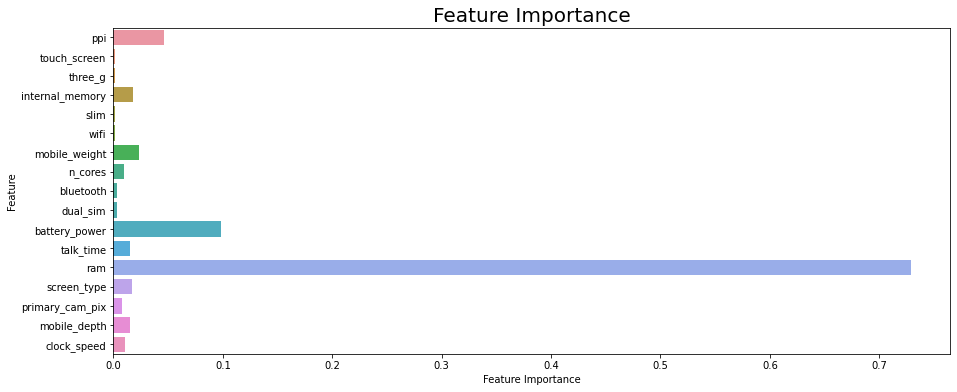

In [156]:
# Feature Importance plot
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Feature Importance',y="Feature", data=importance_df)
plt.show()



*   Here we can see that RAM feature is given the most importance, whereas other features are given relatively low importance.



Text(0.5, 1.0, 'Confusion Matrix')

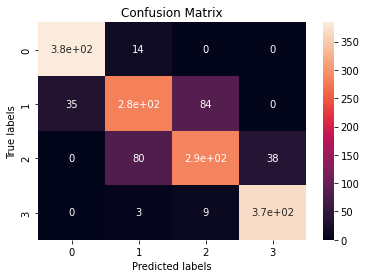

In [157]:
# Random Forest Confusion Matrix Train Data Plot
ax= plt.subplot()
sns.heatmap(train_cm_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

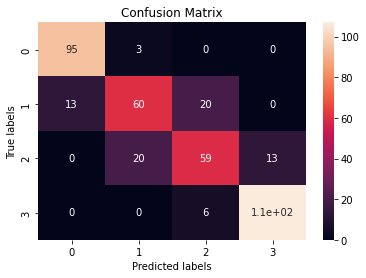

In [158]:
# Random Forest Confusion Matrix Test Data Plot
ax= plt.subplot()
sns.heatmap(test_cm_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Model Evaluation

In [159]:
# Train metrics Dataframe
model=['Logistic regression','Logistic Regression CV','K Nearest Neighbours','Support Vector Machine','Random Forest Classifier']
metrics={"Accuracy":[log_train_accuracy,logcv_train_accuracy,knn_train_accuracy,svm_train_accuracy,rf_train_accuracy],"Recall":[log_train_recall,logcv_train_recall,knn_train_recall,svm_train_recall,rf_train_recall],"Precision":[log_train_precision,logcv_train_precision,knn_train_precision,svm_train_precision,rf_train_precision],
    'f1_score':[log_train_f1_score,logcv_train_f1_score,knn_train_f1_score,svm_train_f1_score,rf_train_f1_score],"ROC_AUC":[log_train_roc_auc,logcv_train_roc_auc,knn_train_roc_auc,svm_train_roc_auc,rf_train_roc_auc]}
train_metrics_df = pd.DataFrame(data=metrics,index=model)
train_metrics_df

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.833965,0.836287,0.830556,0.832680,0.953372
Logistic Regression CV,0.667929,0.669965,0.668858,0.668821,0.893889
K Nearest Neighbours,0.833965,0.836287,0.830556,0.832680,0.975643
Support Vector Machine,0.851641,0.852637,0.850572,0.851295,0.974551
Random Forest Classifier,0.845328,0.847194,0.843694,0.844056,0.965527


In [160]:
# Test metrics Dataframe
model=['Logistic regression','Logistic Regression CV','K Nearest Neighbours','Support Vector Machine','Random Forest Classifier']
metrics={"Accuracy":[log_test_accuracy,logcv_test_accuracy,knn_test_accuracy,svm_test_accuracy,rf_test_accuracy],"Recall":[log_test_recall,logcv_test_recall,knn_test_recall,svm_test_recall,rf_test_recall],"Precision":[log_test_precision,logcv_test_precision,knn_test_precision,svm_test_precision,rf_test_precision],
    'f1_score':[log_test_f1_score,logcv_test_f1_score,knn_test_f1_score,svm_test_f1_score,rf_test_f1_score],"ROC_AUC":[log_test_roc_auc,logcv_test_roc_auc,knn_test_roc_auc,svm_test_roc_auc,rf_test_roc_auc]}
train_metrics_df = pd.DataFrame(data=metrics,index=model)
train_metrics_df

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.810606,0.800689,0.797076,0.797317,0.944841
Logistic Regression CV,0.676768,0.669835,0.669469,0.669433,0.896947
K Nearest Neighbours,0.810606,0.800689,0.797076,0.797317,0.973415
Support Vector Machine,0.843434,0.840761,0.840792,0.839929,0.974698
Random Forest Classifier,0.873737,0.866840,0.868735,0.866474,0.976438
